## PROJECT SCENARIO
The company is trying to venture into the Indian start-up ecosystem. As the data experts of the company, we are to investigate the ecosystem and propose the best course of action

## PROJECT DESCRIPTION
In this project, we are going to analyze funding received by start-ups in India from 2018 to 2021. Data for each year of funding is located in a separate csv file in the dataset provided. In these files are the start-ups' details, the funding amounts received, and the investors' information.

As Data Analysts for this project, we are required to explore the datasets, clean and prepare these datasets, analyze the final prepared dataset and tell compelling stories with intuitive and appropraite visualizations



## BUSINESS QUESTIONS
1. Which Industries/sectors received the most and least funding from investors?
2. What were the top five (5) cities with the most start-ups?
3. What were the top (10) start-ups with most funding?
4. Who were the leading or top investors by number of investments made?
5. What was the trend of funding in the recorded period?
6. Which stage did start-ups receive the most funding?
7. What were the common investment type or stage?
8. Which investors invested the biggest funds in a particular sector?
9. Which cities received the highest funding?
10. What is the average amount a startup is likely to receive as total funding?
11. What is the average amount a startup is likely to receive as seed fund?

# IMPORTING THE REQUIRED LIBRARIES AND LOADING THE FUNDING DATASETS

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import math


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [174]:
# Import funding datasets

funding_2018 = pd.read_csv("C:\\Users\PC\\DATA_ANALYTICS_AA\\DATA_ANALYTICS_AA\\PROJECT_PHASE\\PROJECT_1\\DATASET\\startup_funding2018.csv")
funding_2019 = pd.read_csv("C:\\Users\PC\\DATA_ANALYTICS_AA\\DATA_ANALYTICS_AA\\PROJECT_PHASE\\PROJECT_1\\DATASET\\startup_funding2019.csv")
funding_2020 = pd.read_csv("C:\\Users\PC\\DATA_ANALYTICS_AA\\DATA_ANALYTICS_AA\\PROJECT_PHASE\\PROJECT_1\\DATASET\\startup_funding2020.csv")
funding_2021 = pd.read_csv("C:\\Users\PC\\DATA_ANALYTICS_AA\\DATA_ANALYTICS_AA\\PROJECT_PHASE\\PROJECT_1\\DATASET\\startup_funding2021.csv")

### EXPLORING THE 2018 FUNDING DATASET

In [353]:
# Description funds for 2018

funding_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### checking the basic info of the dataset

In [354]:
# Checking the shape of the dataset

funding_2018.shape

print("The 2018 Funding data contains " ,funding_2018.shape[0], "rows and " ,funding_2018.shape[1], "columns")

The 2018 Funding data contains  526 rows and  6 columns


In [355]:
# Checking the info of the 2018 dataset

funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [356]:
# Checking brief description of the 2018 dataset

funding_2018.describe(include="all").transpose()

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [357]:
# Checking for NaN values in the dataset

funding_2018.isna().any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

In [358]:
# Checking for null values in the dataset

funding_2018.isnull().any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

### Checking for duplicate(s) in the dataset

In [359]:
# Checking for duplicates in the 2018 funding dataset

funding_2018.duplicated().sum()

1

In [360]:
# Checking for duplicated entry

funding_2018[funding_2018.duplicated()]

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


### Investigating the issue of duplicated value in the dataset

In [361]:
# Investigating the duplicated entry
funding_2018[funding_2018["Company Name"]=="TheCollegeFever"]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


#### Overview of the "AMOUNT" column

In [362]:
# Checking the Amount column
funding_2018["Amount"]

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

### Cross-checking selected columns for errors

In [17]:
# Further cross-checking of selected columns

# pd.set_option('display.max_rows', None)
# funding_2018[["Company Name", "Industry", "Round/Series", "Location"]]


#NOTE : You can remove the # symbol form the code above and run it. It will display all rows of the
#highlighted columns.This will help in cross-checking every value in the columns for possible errors.

# This was done to prevent a very long notebook being uploaded to github since all rows in the columns 
#will be displayed


### EXPLORING THE 2019 FUNDING DATASET


In [364]:
funding_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Checking the basic info of the dataset

In [365]:
# Cheking the shape of the dataset

funding_2019.shape

print("The 2019 Funding data contains " ,funding_2019.shape[0], "rows and " ,funding_2019.shape[1], "columns")

The 2019 Funding data contains  89 rows and  9 columns


In [366]:
# Checking the basic info of the dataset

funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [367]:
# Cecking the summary description of 2019 funding data

funding_2019.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
# Checking for NaN values

funding_2019.isna().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector            True
What it does     False
Founders          True
Investor         False
Amount($)        False
Stage             True
dtype: bool

In [369]:
# Checking for the number of NaN values

funding_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

##### From the above, it can be evidenced that there are NaN values in the dataset that need to be computed. The process of treating null values can be found in the "RESOLVING ISSUES RAISED FROM THE DATASET" markdown cell

### Checking for duplicate(s) in the dataset

In [370]:
# Checking for duplicated values

funding_2019.duplicated().any()


False

##### From the above, there were no duplicated values in the dataset

### Selecting and Highlighting columns for errors

In [16]:
# Cross-checking selected columns for errors


# pd.set_option('display.max_rows', None)
# funding_2019[["Company/Brand", "Sector", "Investor", "Stage"]]


#NOTE : You can remove the # symbol form the code above and run it. It will display all rows of the
#highlighted columns.This will help in cross-checking every value in the columns for possible errors.

# This was done to prevent a very long notebook being uploaded to github since all rows in the columns 
#will be displayed

### EXPLORING 2020 FUNDING DATA

In [372]:
funding_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


### Checking the basic info of the dataset

In [373]:
# Checking the shape of the data

funding_2020.shape

print("The 2020 Funding data contains " ,funding_2020.shape[0], "rows and " ,funding_2020.shape[1], "columns")

The 2020 Funding data contains  1055 rows and  10 columns


In [374]:
# Checking the basic info of the dataset

funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [375]:
funding_2020.isnull().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector            True
What it does     False
Founders          True
Investor          True
Amount($)         True
Stage             True
Unnamed: 9        True
dtype: bool

In [376]:
funding_2020.isnull().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
dtype: int64

#####  From the information above, it can be realised that there are NaN values in the dataset that needs to be woked. The process of treating NaN values is outlined in the "RESOLVING ISSUES RAISED FROM THE DATASET" markdown cell

In [377]:
# Checking the statistical description of the dataset

funding_2020.describe().transpose()

,count,unique,top,freq
Company/Brand,1055,905,Nykaa,6
Founded,843,27,2015,136
HeadQuarter,961,77,Bangalore,317
Sector,1042,302,Fintech,80
What it does,1055,990,Provides online learning classes,4
Founders,1043,927,Falguni Nayar,6
Investor,1017,848,Venture Catalysts,20
Amount($),1052,309,Undisclosed,243
Stage,591,42,Series A,96
Unnamed: 9,2,2,Pre-Seed,1


### Highlghting and Investigating the unnamed column

In [18]:
# Investigating the unnamed column:9

# pd.set_option('display.max_rows', None)
# funding_2020["Unnamed: 9"]


#NOTE : You can remove the # symbol form the code above and run it. It will display all rows of the
#highlighted columns.This will help in cross-checking every value in the columns for possible errors.

# This was done to prevent a very long notebook being uploaded to github since all rows in the columns 
#will be displayed

### Selecting  columns to investigate for errors

In [19]:
# Cross-checking selcted columns

# pd.set_option('display.max_rows', None)
# funding_2020[["Company/Brand", "Sector", "Investor", "Stage", "HeadQuarter"]]


#NOTE : You can remove the # symbol form the code above and run it. It will display all rows of the
#highlighted columns.This will help in cross-checking every value in the columns for possible errors.

# This was done to prevent a very long notebook being uploaded to github since all rows in the columns 
#will be displayed

### Checking for duplicate values in the dataset

In [380]:
# Checking for duplicated values

funding_2020.duplicated().any()

True

In [381]:
# Summary number of duplicated values

funding_2020.duplicated().sum()

3

##### From the above, it can be recognised that there are three(3) duplicated values in the dataset

### Highlighting the duplicated values in the dataset

In [382]:
#Checking duplicated start-ups

funding_2020[funding_2020.duplicated()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City","$600,000",Seed,NaN
205,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",Undisclosed,NaN,NaN
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management","$500,000,000",NaN,NaN


### Investigating the issue of duplicated values in the dataset

In [383]:
# Highlighting and investigating duplicated value  - "Krimanshi"

funding_2020[funding_2020["Company/Brand"]=="Krimanshi"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
129,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City","$600,000",Seed,NaN
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City","$600,000",Seed,NaN
941,Krimanshi,NaN,Jodhpur,Agritech,Sustainable system to feed animals by valorizi...,Nikhil Bohra,Arunachal Pradesh Social Entrepreneurship Meet,"$20,000",NaN,NaN


In [384]:
# Highlighting and investigating duplicated value -- Nykaa

funding_2020[funding_2020["Company/Brand"]=="Nykaa"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
120,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",Undisclosed,NaN,NaN
205,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",Undisclosed,NaN,NaN
213,Nykaa,2012,Mumbai,E-commerce,Nykaa is an online marketplace for different b...,Falguni Nayar,"Katrina Kaif, Steadview Capital",Undisclosed,NaN,NaN
340,Nykaa,2012,Mumbai,Fashion,Cosmetics & beauty products online,Falguni Nayar,Steadview Capital,"$24,700,000",NaN,NaN
712,Nykaa,2012,Mumbai,Ecommerce,Deals in cosmetic and wellness products,Falguni Nayar,Steadview capital,"$8,800,000",NaN,NaN
813,Nykaa,2012,Mumbai,Ecommerce,Deals in cosmetic and wellness products,Falguni Nayar,Steadview capital,"$13,137,000",NaN,NaN


In [385]:
# Highlighting and investigating duplicated value -- Byju’s

funding_2020[funding_2020["Company/Brand"]=="Byju’s"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
326,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management","$500,000,000",NaN,NaN
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management","$500,000,000",NaN,NaN


### EXPLORING 2021 FUNDING DATASET


In [386]:
# Checking the head of the data

funding_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [387]:
# Cecking the tail of the data

funding_2021.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


### Checking the basic info of the dataset

In [388]:
# Checking the shape of the data

funding_2021.shape

print("The 2021 Funding data contains " ,funding_2021.shape[0], "rows and " ,funding_2021.shape[1], "columns")

The 2021 Funding data contains  1209 rows and  9 columns


In [389]:
# Checking the basic info of the data

funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [390]:
# Summary statistical description of the data

funding_2021.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for NaN values

In [391]:
# Checking for NaN values

funding_2021.isna().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector           False
What it does     False
Founders          True
Investor          True
Amount($)         True
Stage             True
dtype: bool

In [392]:
# Finding the sum of total of missing values
funding_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

##### From the information above, it can be realised that there are NaN values in the dataset that needs to be woked. The process of treating NaN values is outlined in the "RESOLVING ISSUES RAISED FROM THE DATASET" markdown cell

In [21]:
# Cross-checking selected columns for errors

# pd.set_option('display.max_rows', None)
# funding_2021[["Company/Brand", "Sector", "Investor", "Stage", "HeadQuarter"]]


#NOTE : You can remove the # symbol form the code above and run it. It will display all rows of the
#highlighted columns.This will help in cross-checking every value in the columns for possible errors.

# This was done to prevent a very long notebook being uploaded to github since all rows in the columns 
#will be displayed

### Checking for duplicated values

In [394]:
# Checking for duplicated values

funding_2021.duplicated().any()

True

In [395]:
print ("There are ",len(funding_2021[funding_2021.duplicated()]) ,"duplicated values in the dataset")

There are  19 duplicated values in the dataset


### Highlight the duplicated values in the dataset

In [396]:
# highlingting duplicated values

funding_2021[funding_2021.duplicated()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,NaN
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,NaN
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,NaN
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,NaN
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


### Investigating the issue of duplicated values

In [397]:
# Investigating duplicated values  ---  "Curefoods"

funding_2021[funding_2021["Company/Brand"]=="Curefoods"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,NaN
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,NaN


In [398]:
# Investigating duplicated values  ---  "Bewakoof"

funding_2021[funding_2021["Company/Brand"]=="Bewakoof"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,NaN
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,NaN
740,Bewakoof,2011.0,Mumbai,D2C Fashion,Society perceives Bewakoof as stupid.But what ...,Prabhkiran Singh,"IvyCap Ventures, Pratithi Investment Trust","$4,000,000",NaN


In [399]:
# Investigating duplicated values  ---  "FanPlay"

funding_2021[funding_2021["Company/Brand"]=="FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [400]:
# Investigating duplicated values  ---  "Advantage Club"

funding_2021[funding_2021["Company/Brand"]=="Advantage Club"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,NaN
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,NaN
877,Advantage Club,2014.0,Gurugram,HR Tech,Advantage Club is India's largest employee eng...,Sourabh Deorah,"Y Combinator, Jetty Ventures, Earlsfield Capit...",$3300000,Pre-series A


In [401]:
# Investigating duplicated values  ---  "Ruptok"

funding_2021[funding_2021["Company/Brand"]=="Ruptok"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,NaN
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,NaN
385,Ruptok,2020.0,New Delhi,FinTech,Ruptok operates as a fintech platform for gold...,"Ankur Gupta, Akshita Gupta, Yashwardhan Aeren",Wurk,"$10,000,000",NaN


In [402]:
# Investigating duplicated values  ---  "Trinkerr"

funding_2021[funding_2021["Company/Brand"]=="Trinkerr"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
229,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A


In [403]:
# Investigating duplicated values  ---  "Zorro"

funding_2021[funding_2021["Company/Brand"]=="Zorro"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
230,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed


In [404]:
# Investigating duplicated values  ---  "Ultraviolette"

funding_2021[funding_2021["Company/Brand"]=="Ultraviolette"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
231,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C


In [405]:
# Investigating duplicated values  ---  "NephroPlus"

funding_2021[funding_2021["Company/Brand"]=="NephroPlus"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
232,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E


In [406]:
# Investigating duplicated values  ---  "Unremot"

funding_2021[funding_2021["Company/Brand"]=="Unremot"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
233,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [407]:
# Investigating duplicated values  ---  "FanAnywhere"

funding_2021[funding_2021["Company/Brand"]=="FanAnywhere"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
234,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed
248,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed


In [408]:
# Investigating duplicated values  ---  "PingoLearn"

funding_2021[funding_2021["Company/Brand"]=="PingoLearn"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
235,PingoLearn,2021.0,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",$200000,NaN
249,PingoLearn,2021.0,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",$200000,NaN


In [409]:
# Investigating duplicated values  ---  "Spry"

funding_2021[funding_2021["Company/Brand"]=="Spry"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
236,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",$1500000,Seed
250,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",$1500000,Seed


In [410]:
# Investigating duplicated values  ---  "Enmovil"

funding_2021[funding_2021["Company/Brand"]=="Enmovil"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
237,Enmovil,2015.0,Hyderabad,Information Technology & Services,Enmovil delivers a Business Intelligence Platf...,"Ravi Bulusu, Nanda Kishore, Venkat Moganty",Anicut Angel Fund,$1300000,Pre-series A
251,Enmovil,2015.0,Hyderabad,Information Technology & Services,Enmovil delivers a Business Intelligence Platf...,"Ravi Bulusu, Nanda Kishore, Venkat Moganty",Anicut Angel Fund,$1300000,Pre-series A


In [411]:
# Investigating duplicated values  ---  "ASQI Advisors"

funding_2021[funding_2021["Company/Brand"]=="ASQI Advisors"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
238,ASQI Advisors,2019.0,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A
252,ASQI Advisors,2019.0,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A


In [412]:
# Investigating duplicated values  ---  "Insurance Samadhan"

funding_2021[funding_2021["Company/Brand"]=="Insurance Samadhan"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
239,Insurance Samadhan,2018.0,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A
253,Insurance Samadhan,2018.0,New Delhi,Insurance,The insurance industry will help in representa...,Deepak Bhuvenshwari Uniyal,"9Unicorns, ZNL",$725000,Pre-series A


In [413]:
# Investigating duplicated values  ---  "Evenflow Brands"

funding_2021[funding_2021["Company/Brand"]=="Evenflow Brands"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
240,Evenflow Brands,2020.0,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",NaN,$500000,NaN
254,Evenflow Brands,2020.0,Mumbai,Consumer Goods,Identify and partner with the upcoming eCommer...,"Utsav Agarwal, Pulkit Chhabra",NaN,$500000,NaN


In [414]:
# Investigating duplicated values  ---  "MasterChow"

funding_2021[funding_2021["Company/Brand"]=="MasterChow"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [415]:
# Investigating duplicated values  ---  "Fullife Healthcare"

funding_2021[funding_2021["Company/Brand"]=="Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


## ISSUES WITH THE DATA
#### FUNDING YEAR 2018
1. Amount has datatype as object. It should be a float data type
2. There are different currencies in the Amount column. All currencies are supposed to be in dollars. There are commas in certain values.
3. There are Non-Avalaible Values(NaN) in the dataset
4. Company names mixed with website
5. There is a google document link in the Rounds/Series column
6. The "About" column has no influence on our analysis so hence must be removed.
7. There is 1 duplicated information in the dataset(Company Name = TheCollegeFever)
8. Location column is not consistent with the rest of the dataset. It contained city, State, and Country.
9. There are locations that contain India, Asia. This will be replaced with the most recurring city.

#### FUNDING YEAR 2019
1. There are lots NaN values*** in the Stage, HeadQuaters and Founded columns
2. There is the currency sign and commas attached to the amounts.
3. What the company does has no influence on our data.
4. The Founded Column is in float
5. Amount column is in object.
6. The Founder columnn is not important to our analysis
7. Company/Brand column must be renamed to Company

#### FUNDING YEAR 2020
1. Company/Brand column must be renamed to Company
2. Column, "Unnamed:9" has no influence on our dataset
3. There is the currency sign and commas attached to the amounts.
4. Spelling error (>Vikram Sud, column=192) in the investor column
5. There are Headquaters cities that are outside India.
6. Duplicated three entries (Byju’s, Nykaa, Krimanshi)
7. Columns with names of cities and state.

#### FUNDING YEAR 2021
1. Company/Brand column must be renamed to Company
2. There is the currency sign and commas attached to the amounts.
3. HeadQuaters changed to Location
4. There are lots of NaN values
5. There are duplicated values (Curefoods, Bewakoofs, FanPlay, Advantage Club, Ruptok, Trinker, Zorro, Ultraviollette, Nephroplus, Unremot, Fansanywhere,Pingolearn, Spy, Enmovil, ASQI Advisers, Insurance Samadhan, Evenflow Brands, MasterChow, Fullife healthcare)
6. There are instances where values have been recorded under the wrong columns

### RESOLVING ISSUES RAISED FROM THE DATASET
1. Write python functions and pandas codes to remove currency symbols, empty spaces and commas in the numeric values.
2. Write python functions and codes to covert datatype of numeric values recorded as objects(string) to floats or ints.
3. Replace all categorical null and NaN values with Unknown or Undisclosed.
4. Remove columns that will have no impact on the analysis.
5. Provide a common name for values with same meaning in the Stage column
6. Change HeadQuarters column name to Location
7. Remove hedquaters cities that are outside India
8. Replace NaN categorical values with "Unknown" and undisclosed numeric values with 0.
9. Locations that contain names of cities, states and country will be replaced with only names of cities
10. Row 78, location will be changed to Chennai, row 161 location will be changed to Jaipur, row 184 chnage location to Dhingsara, row 282 change location to Trivanduram, row 284 change location to Samastipor, row 288 change location to Tomkor
11. Remove duplicated values.

## DATA CLEANING AND PREPARATION

1. All identified errors or issues in the dataset will be corrected in the cleaning process.
2. The datasets will be concactenanted into a single dataset

### CLEANING THE 2018 FUNDING DATASET

In [175]:
funding_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### DROP IRRELEVANT COLUMNS
The "About Company" column is irrelevant to our analysis, hence, we have decided to drop it

In [176]:
funding_2018.drop("About Company", axis=1, inplace=True)

### RENAMING COLUMNS

In [177]:
funding_2018 = funding_2018.rename(columns={"Company Name" : "Company", "Round/Series" : "Stage", "Industry" : "Sector",
                                           "Amount" : "Amount($)"})

In [178]:
funding_2018.head()

,Company,Sector,Stage,Amount($),Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India"


### CLEANING THE "COMPANY" COLUMN

In [179]:
# Splitting special characters in the company names

funding_2018["Company"] = funding_2018["Company"].str.split(".").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("/").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("(").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("!").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("/").str[0]

In [180]:
funding_2018["Company"] = funding_2018["Company"].str.strip("&")

### CLEANING THE  SECTOR COLUMN

In [181]:
# Inputing empty spaces with "Uknown"

funding_2018['Sector'] = funding_2018['Sector'].str.replace('—', 'Unknown')

### CLEANING THE STAGE COLUMN

#### Renaming "Venture - Series Unknown" to "Venture"

In [182]:
funding_2018["Stage"] = funding_2018["Stage"].replace({"Venture - Series Unknown"  : "Venture"})

#### Replacing the google document link with "Undiscloed"

In [183]:
funding_2018["Stage"] = funding_2018["Stage"].drop(labels=178)
funding_2018["Stage"] = funding_2018["Stage"].fillna("Undisclosed")

### CLEANING THE AMOUNT COLUMN

#### Removing special characters ("," , "$", "-") and Inputing empty rows with 0. 


In [184]:
funding_2018["Amount($)"].replace(",", "", regex=True, inplace=True)
funding_2018["Amount($)"].replace("$", "", regex=True, inplace=True)
funding_2018["Amount($)"].replace("—", 0, regex=True, inplace=True)

#### Creating a temporary column for computations

In [185]:
funding_2018['INR Amount'] = funding_2018['Amount($)'].str.split('₹').str[1]
#pd.set_option('display.max_rows',None)
funding_2018["INR Amount"].head()

0         NaN
1    40000000
2    65000000
3         NaN
4         NaN
Name: INR Amount, dtype: object

#### Converting Indian Rupees to Dollar

A conversion rate of 1 India Rupee to 0.0121 US Dollars was used.

In [186]:
funding_2018['INR Amount'] = funding_2018['INR Amount'].apply(float).fillna(0)
funding_2018['USD Amount'] = funding_2018['INR Amount'] * 0.0121
funding_2018['USD Amount'] = funding_2018['USD Amount'].replace(0, np.nan)
funding_2018['USD Amount'] = funding_2018['USD Amount'].fillna(funding_2018['Amount($)'])
funding_2018["Amount($)"] = funding_2018["USD Amount"].apply(lambda x: float(str(x).replace("$","")))
funding_2018["Amount($)"].head()
 


0     250000.0
1     484000.0
2     786500.0
3    2000000.0
4          0.0
Name: Amount($), dtype: float64

#### Drop new columns that were created to convert Indian Rupees to Dollars

In [187]:
funding_2018.drop(["INR Amount", "USD Amount"], axis=1, inplace=True)

#### Cross-checking the Amount column

In [188]:
funding_2018["Amount($)"].head()

0     250000.0
1     484000.0
2     786500.0
3    2000000.0
4          0.0
Name: Amount($), dtype: float64

### CLEANING THE LOCATION COLUMN

From our research, we realized that the Location contained names of Cities, States and Country. Hence, we decided to strip the State and Country. This will ensure that only the Cities remain the values in the Location column.

#### Removing the States and Country from the Location column

In [189]:
funding_2018["Location"]=funding_2018['Location'].str.split(',').str[0]

#### Re-computing the names of cities with errors

In [190]:
# Inputing the right names of cities

funding_2018["Location"] = funding_2018['Location'].replace("Bangalore", "Bengaluru")
funding_2018["Location"] = funding_2018['Location'].replace("Delhi", "New Delhi")
funding_2018["Location"] = funding_2018['Location'].replace("Bangalore City", "Bengaluru")


# Uttar Prasdesh is a State, we computed it with the Capital, Noida, which is in the dataset
funding_2018["Location"] = funding_2018['Location'].replace("Uttar Pradesh", "Noida")


# India is present in the dataset. However, India is not a City, hence, we will replace it "Unknown")
funding_2018["Location"] = funding_2018['Location'].replace("India", "Unknown")

### WORKING ON DUPLICATED VALUES

In [191]:
# Checking for duplicated value

funding_2018[funding_2018.duplicated()]

,Company,Sector,Stage,Amount($),Location
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru


In [192]:
# Investigating the issue of the duplicate

funding_2018[funding_2018["Company"]=="TheCollegeFever"]

,Company,Sector,Stage,Amount($),Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru


#####  From the dataframe above, this a duplicated entry containing the same values in all the columns. Hence, the duplicate will be dropped from the funding dataframe

In [193]:
# Removing the incidence of the duplicated value

funding_2018 = funding_2018.drop_duplicates(subset=None, keep="first")

In [194]:
# Cross-checking the removal of the duplicated value

funding_2018.duplicated().any()

False

In [195]:
# Cross-checking the removal of the duplicated value

funding_2018[funding_2018["Company"]=="TheCollegeFever"]

,Company,Sector,Stage,Amount($),Location
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru


### ADD FUNDING YEAR COLUMN TO DATASET FOR ANALYSIS

In [196]:
funding_2018["funding_year"] = 2018

#### Re-checking the basic info of the 2018 funding dataset

In [197]:
funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       525 non-null    object 
 1   Sector        525 non-null    object 
 2   Stage         525 non-null    object 
 3   Amount($)     525 non-null    float64
 4   Location      525 non-null    object 
 5   funding_year  525 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 28.7+ KB


### VERIFYING THE CLEANED 2018 FUNDING DATASET

In [198]:
funding_2018.head()

,Company,Sector,Stage,Amount($),Location,funding_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,484000.0,Mumbai,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,786500.0,Gurgaon,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,Hyderabad,2018


# CLEANING THE 2019 FUNDING DATASET

In [199]:
funding_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### REMOVING COLUMNS THAT ARE NOT IMPORTANT TO OUR ANALYSIS

In [200]:
# Dropping the "Founded" column
funding_2019.drop("Founded", axis=1, inplace=True)

# Dropping the "What it does" column
funding_2019.drop("What it does", axis=1, inplace=True)

# Dropping the "Founded" column
funding_2019.drop("Founders", axis=1, inplace=True)



### RENAMING COLUMNS TO CONFORM WITH THE REST OF THE FUNDING DATASET

In [201]:
funding_2019 = funding_2019.rename(columns={"Company/Brand" : "Company", "HeadQuarter" : "Location"})

In [202]:
funding_2019.head()

,Company,Location,Sector,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,Mumbai,Edtech,General Atlantic,"$150,000,000",Series C
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### WORKING ON THE COMPANY COLUMN

In [203]:
# Correcting the names of companies displayed as websites

funding_2019 = funding_2019.replace("Observe.AI", "Observe AI")
funding_2019 = funding_2019.replace("m.Paani", "Paani")
funding_2019 = funding_2019.replace("Nivesh.com", "Nivesh")
funding_2019 = funding_2019.replace("Infra.Market", "Infra Market")
funding_2019 = funding_2019.replace("Infra.Market", "Infra Market")
funding_2019 = funding_2019.replace("Fireflies .ai", "Fireflies")

### WORKING ON THE LOCATION COLUMN

In [204]:
# Filling NaN values with "Unknown"
funding_2019 = funding_2019.fillna("Unknown")

# Replacicng "Bangalore" with "Bengaluru"
funding_2019 = funding_2019.replace("Bangalore", "Bengaluru")

# Replacicng "Uttar Pradesh" with "Noida"
funding_2019 = funding_2019.replace("Uttar pradesh", "Noida")

# Replacicng "Delhi" with "New Delhi"
funding_2019 = funding_2019.replace("Delhi", "New Delhi")

funding_2019 = funding_2019.replace("Uknown", "Unknown")

### WORKING ON THE SECTOR COLUMN

In [205]:
# Replacing "&" with ","

funding_2019["Sector"] = funding_2019["Sector"].replace("&", ",", regex=True)

#### Correcting the Names of Sectors 

In [206]:
# Replacing "Tech" as a Sector with "Technology"

funding_2019 = funding_2019.replace("AI , Tech", "AI , Technology", regex=True)

# Replacing "Food , tech" with "FoodTech"
funding_2019 = funding_2019.replace("Food , tech", "FoodTech", regex=True)

# Replacing "Food tech" with "FoodTech"
funding_2019 = funding_2019.replace("Food tech", "FoodTech", regex=True)

# Replacing "Foodtech" with "FoodTech"
funding_2019 = funding_2019.replace("Foodtech", "FoodTech", regex=True)

### WORKING ON THE INVESTOR COLUMN

In [207]:
# Stripping "." from the end of certain investor names

funding_2019["Investor"] = funding_2019["Investor"].str.strip(".")

### WORKING ON THE AMOUNT COLUMN 

In [208]:
funding_2019["Amount($)"].head()

0      $6,300,000
1    $150,000,000
2     $28,000,000
3     $30,000,000
4      $6,000,000
Name: Amount($), dtype: object

#### Take off special symbols("," and "$")

In [209]:
funding_2019["Amount($)"] = funding_2019["Amount($)"].apply(lambda x: str(x).replace(",", ""))
funding_2019["Amount($)"] = funding_2019["Amount($)"].apply(lambda x: str(x).replace("$", ""))

#### Change undisclosed amonts to zero(0)

In [210]:
funding_2019["Amount($)"] = funding_2019["Amount($)"].replace("Undisclosed", 0)
funding_2019["Amount($)"] = funding_2019["Amount($)"].fillna(0)

#### Change the datatype of Amount column

In [211]:
funding_2019["Amount($)"] = funding_2019["Amount($)"].astype(float)
funding_2019["Amount($)"].head()

0      6300000.0
1    150000000.0
2     28000000.0
3     30000000.0
4      6000000.0
Name: Amount($), dtype: float64

## WORKING ON THE STAGE COLUMN

#### Replace NaN values with "Udisclosed"

In [212]:
funding_2019["Stage"] = funding_2019["Stage"].fillna("Undisclosed")

#### Correcting inconsistencies in the values in the stage column

In [213]:
# Replace "Pre Series A" with "Pre-Series A"
funding_2019["Stage"] = funding_2019["Stage"].replace("Pre series A", "Pre-series A")

# Replace "Seed funding" with "Seed fund"
funding_2019["Stage"] = funding_2019["Stage"].replace("Seed funding", "Seed")

# Replace "Seed round" with "Seed fund"
funding_2019["Stage"] = funding_2019["Stage"].replace("Seed round", "Seed")

# Replace "Post seies A" with "Post-series A"
funding_2019["Stage"] = funding_2019["Stage"].replace("Post series A", "Post-series A")

### CHECKING FOR DUPLICATED VALUES

In [214]:
funding_2019.duplicated().any()

True

#### Checking for the occurrence of duplicate

In [215]:
funding_2019[funding_2019.duplicated()]

,Company,Location,Sector,Investor,Amount($),Stage
82,Kratikal,Noida,Technology,"Gilda VC, Art Venture, Rajeev Chitrabhanu",1000000.0,Pre-series A


#### Investigating the occurrence of the duplicated entry

In [216]:
funding_2019[funding_2019["Company"] == "Kratikal"]

,Company,Location,Sector,Investor,Amount($),Stage
7,Kratikal,Noida,Technology,"Gilda VC, Art Venture, Rajeev Chitrabhanu",1000000.0,Pre-series A
82,Kratikal,Noida,Technology,"Gilda VC, Art Venture, Rajeev Chitrabhanu",1000000.0,Pre-series A


##### From the above, it can be concluded that the entry is a duplicated entry with the same values in all the colums

#### Working on the duplicated entry

In [217]:
# Removing the duplicated entry

funding_2019 = funding_2019.drop_duplicates()

In [218]:
# Cross-checking for the removal of duplicated entry

funding_2019.duplicated().any()

False

### ADD YEAR COLUMN TO DATASET FOR FURTHER ANALYSIS

In [219]:
funding_2019["funding_year"] = 2019

### cross-checking the basic info of dataset

In [220]:
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 88
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       88 non-null     object 
 1   Location      88 non-null     object 
 2   Sector        88 non-null     object 
 3   Investor      88 non-null     object 
 4   Amount($)     88 non-null     float64
 5   Stage         88 non-null     object 
 6   funding_year  88 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ KB


### VERIFYING THE CLEANED 2019 FUNDING DATASET

In [221]:
funding_2019.head()

,Company,Location,Sector,Investor,Amount($),Stage,funding_year
0,Bombay Shaving,Unknown,Ecommerce,Sixth Sense Ventures,6300000.0,Unknown,2019
1,Ruangguru,Mumbai,Edtech,General Atlantic,150000000.0,Series C,2019
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),6000000.0,Unknown,2019


## CLEANING THE 2020 FUNDING DATASET

In [222]:
funding_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


### REMOVING COLUMNS THAT ARE IRRELEVANT TO OUR ANALYSIS

In [223]:
# Dropping the "Founded" column
funding_2020 = funding_2020.drop(columns="Founded", axis=1)

# Dropping the "What it does" column
funding_2020 = funding_2020.drop(columns="What it does", axis=1)

# Dropping the "Founders" column
funding_2020 = funding_2020.drop(columns="Founders", axis=1)

# Dropping the "Unnamed: 9" column
funding_2020 = funding_2020.drop(columns="Unnamed: 9", axis=1)


### RENAMING COLUMN HEADS TO BE CONSISTENT WITH THE REST OF DATA

In [224]:
# Rename Company/Brand and HeadQuarter columns to conform with the rest of the data

funding_2020 = funding_2020.rename(columns={"Company/Brand" : "Company", "HeadQuarter" : "Location"})

### WORKING ON THE COMPANY COLUMN

#### Correcting Names of Companies to remove special characters

In [225]:
# Correcting "OurEye.ai"
funding_2020["Company"] = funding_2020["Company"].replace("OurEye.ai", "OurEye AI")

# Correcting "TaxBuddy.com"
funding_2020["Company"] = funding_2020["Company"].replace("TaxBuddy.com", "TaxxBuddy")

# Correcting "Callify.ai"
funding_2020["Company"] = funding_2020["Company"].replace("Callify.ai", "Callify AI")

# Correcting "Artivatic.ai"
funding_2020["Company"] = funding_2020["Company"].replace("Artivatic.ai", "Artivatic AI")

# Correcting "Infra.Market"
funding_2020["Company"] = funding_2020["Company"].replace("Infra.Market", "Infra Market")

# Correcting "Tamasha.live" 
funding_2020["Company"] = funding_2020["Company"].replace("Tamasha.live", "Tamasha")

# Correcting "Rephrase.ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Rephrase.ai", "Rephrase AI")

# Correcting "Observe ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Observe ai", "Observe AI")

# Correcting "Apna.co" 
funding_2020["Company"] = funding_2020["Company"].replace("Apna.co", "Apna")

# Correcting "Phool.co" 
funding_2020["Company"] = funding_2020["Company"].replace("Phool.co", "Phool")

# Correcting "Univ.ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Univ.ai", "Univ AI")

# Correcting "Verloop.io" 
funding_2020["Company"] = funding_2020["Company"].replace("Verloop.io", "Verloop")

# Correcting "Locale ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Locale ai", "Locale AI")


# Correcting "Byju" 
funding_2020["Company"] = funding_2020["Company"].replace("Byju", "Byju's")

# Correcting "Vernacular ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Vernacular ai", "Vernacular AI")

# Correcting "Qure ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Qure ai", "Qure AI")

### WORKING ON THE LOCATION COLUMN

#### correcting the names of cities to conform with other datasets

In [226]:
# Rename "Bangalore" to "Bengaluru"
funding_2020["Location"] = funding_2020["Location"].replace("Bangalore", "Bengaluru")

# Split cities from states
funding_2020["Location"] = funding_2020["Location"].str.split(',').str[0]

# Fill NaN values with "Unknown"
funding_2020["Location"] = funding_2020["Location"].fillna("Unknown")

# Rename "Delhi" to "New Delhi"
funding_2020["Location"] = funding_2020["Location"].replace("Delhi", "New Delhi")

# Rename "Uttar Pradesh" to "Noida" Tamil Nadu
funding_2020["Location"] = funding_2020["Location"].replace("Uttar Pradesh", "Noida")

# Rename "Tamil Nadu(State)" to "Trivandrum(City)" 
funding_2020["Location"] = funding_2020["Location"].replace("Tamil Nadu", "Trivandrum")

#### We acknowledege that the location column contains names of cities outside India. These are the Headqauters locations of their corresponding startups in India. 
#### We suppose that these companies have subsidiary start-ups in India, and their corresponding details, which are, "sector", "Investor", "Amount" and "Stage" are accurate.
#### Hence, we decided not to remove these entries since it may have significant impact on our analysis

### WORKING ON THE SECTOR COLUMN

In [227]:
# Replace "&", "/" with ","
funding_2020["Sector"] = funding_2020["Sector"].str.replace("&", ",")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("/", " , ")


# Remove startup, company, platform, Industry, from names of sector to make it uniform with th rest of the funding dataset
funding_2020["Sector"] = funding_2020["Sector"].str.replace("startup", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("Startup", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("company", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("platform", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("Industry", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("Company", "")

# Relace NaN values with "Unkknown"
funding_2020["Sector"] = funding_2020["Sector"].fillna("Unknown")


In [228]:
# Replace "tech" with "Tech" for uniformity
funding_2020["Sector"] = funding_2020["Sector"].replace("tech", "Tech", regex=True) 

In [229]:
# More on correction of sector names

funding_2020["Sector"] = funding_2020["Sector"].replace({"EdtTech" : "EdTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Soil-Tech" : "SoilTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Insurtech" : "InsureTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Agritech" : "AgriTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Tech" : "Technology"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Ecommerce" : "E-commerce"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"E store" : "E-Store"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Estore" : "E-Store"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Food Tech" : "FoodTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Social commerce" : "Social e-commerce"})

### WORKING ON THE AMOUNT COLUMN

#### Remove special signs from amount

In [230]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace(",", "")
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace("$", "")

####  Correct incosistent amounts

In [231]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace("887000 23000000", "23000000")
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace("800000000 to 850000000", "850000000")

#### Convert undisclosed and NaN values to 0

In [232]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].replace("Undisclosed", 0)
funding_2020["Amount($)"] = funding_2020["Amount($)"].replace("Undiclsosed", 0)
funding_2020["Amount($)"] = funding_2020["Amount($)"].replace("Undislosed", 0)
funding_2020["Amount($)"] = funding_2020["Amount($)"].fillna(0)

#### Change the datatype of amounts to floats

In [233]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].astype(float)
funding_2020["Amount($)"].head()

0    200000.0
1    100000.0
2         0.0
3    400000.0
4    340000.0
Name: Amount($), dtype: float64

### WORKING ON THE INVESTOR COLUMN

In [234]:
# Fill NaN values with "Undisclosed"
funding_2020["Investor"] = funding_2020["Investor"].fillna("Undisclosed")

# Remove special characters
funding_2020["Investor"] = funding_2020["Investor"].str.replace(">", "")
funding_2020["Investor"] = funding_2020["Investor"].str.replace("!", "")
funding_2020["Investor"] = funding_2020["Investor"].str.replace("`", "")

# Correct names of investors
funding_2020["Investor"] = funding_2020["Investor"].replace("ah ! Ventures", "Ah Ventures")
funding_2020["Investor"] = funding_2020["Investor"].replace("Angel investors. HNI", "Angel investors, HNI")
funding_2020["Investor"] = funding_2020["Investor"].replace("Sequoia", "Sequoia Capital")
funding_2020["Investor"] = funding_2020["Investor"].replace("Angellist India", "Angel List India")
funding_2020["Investor"] = funding_2020["Investor"].replace("Angel investors", "Angel Investors")
funding_2020["Investor"] = funding_2020["Investor"].replace("CITE.CO", "IIM Ahmedabad’s incubator (CIIE.CO)")
funding_2020["Investor"] = funding_2020["Investor"].replace("Lightbox. Social Capital, Dunce Capital", "Lightbox, Social Capital, Dunce Capital")




### WORKING ON THE STAGE COLUMN

#### Replace NaN values with "Undisclosed"

In [235]:
funding_2020["Stage"] = funding_2020["Stage"].fillna("Undisclosed")

#### Correct names of Stage with errors

In [236]:
funding_2020["Stage"] = funding_2020["Stage"].replace(" Pre- series A", " Pre-series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Seed round", "Seed")
funding_2020["Stage"] = funding_2020["Stage"].replace("Seed Round & Series A", "Seed, Series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre Series A", "Pre-series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre seed Round", "Pre-seed")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre seed round", "Pre-seed")
funding_2020["Stage"] = funding_2020["Stage"].replace("Angel Round", "Angel")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre series A1", "Pre-series A1")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre series A", "Pre-series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre series B", "Pre-series B")
funding_2020["Stage"] = funding_2020["Stage"].replace("Series C, D", "Series C, Series D")

#### Remove classifying descriptions from names of stage

In [237]:
funding_2020["Stage"] = funding_2020["Stage"].str.replace("Round", "")
funding_2020["Stage"] = funding_2020["Stage"].str.replace("Investment", "")
funding_2020["Stage"] = funding_2020["Stage"].str.replace("funding", "")
funding_2020["Stage"] = funding_2020["Stage"].str.replace("Funding", "")

### WORKING ON DUPLICATES

In [238]:
funding_2020.duplicated().any()

True

#### Checking for the occurrence of duplicates

In [239]:
funding_2020[funding_2020.duplicated()]

,Company,Location,Sector,Investor,Amount($),Stage
145,Krimanshi,Jodhpur,BioTechnology,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
205,Nykaa,Mumbai,Cosmetics,"Alia Bhatt, Katrina Kaif",0.0,Undisclosed
362,Byju’s,Bengaluru,EdTech,"Owl Ventures, Tiger Global Management",500000000.0,Undisclosed
964,Yolo,Gurugram,Transport,Undisclosed,600000.0,Seed


#### Investigating the occurrence of duplicates

In [240]:
funding_2020[funding_2020["Company"] == "Krimanshi"]

,Company,Location,Sector,Investor,Amount($),Stage
129,Krimanshi,Jodhpur,BioTechnology,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
145,Krimanshi,Jodhpur,BioTechnology,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
941,Krimanshi,Jodhpur,AgriTech,Arunachal Pradesh Social Entrepreneurship Meet,20000.0,Undisclosed


##### from the dataframe,rows 129 and 145 are duplicated entries. Hence, row 145 will be dropped.

In [241]:
funding_2020[funding_2020["Company"] == "Nykaa"]

,Company,Location,Sector,Investor,Amount($),Stage
120,Nykaa,Mumbai,Cosmetics,"Alia Bhatt, Katrina Kaif",0.0,Undisclosed
205,Nykaa,Mumbai,Cosmetics,"Alia Bhatt, Katrina Kaif",0.0,Undisclosed
213,Nykaa,Mumbai,E-commerce,"Katrina Kaif, Steadview Capital",0.0,Undisclosed
340,Nykaa,Mumbai,Fashion,Steadview Capital,24700000.0,Undisclosed
712,Nykaa,Mumbai,E-commerce,Steadview capital,8800000.0,Undisclosed
813,Nykaa,Mumbai,E-commerce,Steadview capital,13137000.0,Undisclosed


##### Rows 120 and 205 are duplicated entries. Hence, row 205 will be removed

In [242]:
funding_2020[funding_2020["Company"] == "Byju’s"]

,Company,Location,Sector,Investor,Amount($),Stage
326,Byju’s,Bengaluru,EdTech,"Owl Ventures, Tiger Global Management",500000000.0,Undisclosed
362,Byju’s,Bengaluru,EdTech,"Owl Ventures, Tiger Global Management",500000000.0,Undisclosed


##### Rows 326 and 362 are duplicated entries. Hence, row 362 will be dropped

In [243]:
funding_2020[funding_2020["Company"] == "Yolo"]

,Company,Location,Sector,Investor,Amount($),Stage
902,Yolo,Gurugram,Transport,Undisclosed,600000.0,Seed
964,Yolo,Gurugram,Transport,Undisclosed,600000.0,Seed


##### Rows 902 and 964 are duplicated entries. Hence, row 964 will be dropped

### Dropping Duplicated Entries

These rows were duplicated entries and as such must be dropped form the 2020 funding dataset
1. Row 145
2. Row 205
3. Row 362
4. Row 964

In [244]:
# Dropping identified duplicated entries

funding_2020 = funding_2020.drop_duplicates(subset=None, keep="first")

In [245]:
# Cross-checking to verify dropping of duplicates

funding_2020.duplicated().any()

False

### ADD YEAR COLUMN TO DATASET FOR FURTHER ANALYSIS

In [246]:
funding_2020["funding_year"] = 2020

#### Re-checking the basic info of the 2019 funding dataset

In [247]:
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1051 non-null   object 
 1   Location      1051 non-null   object 
 2   Sector        1051 non-null   object 
 3   Investor      1051 non-null   object 
 4   Amount($)     1051 non-null   float64
 5   Stage         1051 non-null   object 
 6   funding_year  1051 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 65.7+ KB


### The cleaned 2020 Funding Dataset

In [248]:
funding_2020.head()

,Company,Location,Sector,Investor,Amount($),Stage,funding_year
0,Aqgromalin,Chennai,AgriTech,Angel Investors,200000.0,Undisclosed,2020
1,Krayonnz,Bengaluru,EdTech,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Venture Center,0.0,Pre-seed,2020
3,NCOME,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,Undisclosed,2020
4,Gramophone,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,Undisclosed,2020


## CLEANING THE 2021 FUNDING DATASET

### Important notice for corrections
Theses errors were noticed in the Data Understanding phase

##### Label 98, 111 (FanPlay)
No Location

Amount 1200000 was recorded under Stage

Investor(Upstarks) was recorded under Amount

##### Label 241, 255 (MasterChow)
Sector(Food & Beverages) was recorded under Location

Location (Hauz Khas) was recorded under Sector 

##### Label 242, 256 (Fullife Healthcare)
Amount of 22000000 was recorded under Investor

Investor (Morgan Stanley, Private Equity Asia) was recorded under Founder

Stage(Series C) was recorded under Amount

Sector (Pharmaceuticals) was recorded under Location

There was no location recorded

##### Label 1100
Sector - Online Media

##### Label 1176(Peak)
Location  -  Manchester

Sector  - Information Technology

### CORRECTING THE IDENTIFIED ERRORS

#### LABEL 98, 111(FANPLAY)

In [249]:
funding_2021.loc[(98, 111), "Amount($)"] = "$1200000"
funding_2021.loc[(98, 111), "Stage"] = "Unknown"
funding_2021.loc[(98, 111), "Investor"] = "Upsparks"
funding_2021.loc[(98, 111), "HeadQuarter"] = "Unknown"

#### LABEL 241, 255(MASTERCHOW)

In [250]:
funding_2021.loc[(241, 255), "HeadQuarter"] = "Hauz Khas"
funding_2021.loc[(241, 255), "Sector"] = "Food & Beverages"

#### LABEL 257(MoEVing)

In [251]:
funding_2021.loc[257, "Amount($)"] = "$5000000"
funding_2021.loc[257, "HeadQuarter"] = "Gurugram"
funding_2021.loc[257, "Sector"] = "Electronic Vehicle"
funding_2021.loc[257, "Stage"] = "Seed"
funding_2021.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

#### LABEL 242, 256(FULLIFE HEALTHCARE)

In [252]:
funding_2021.loc[(242, 256), "Amount($)"] = "$22000000"
funding_2021.loc[(242, 256), "Investor"] = "Morgan Stanley Private Equity Asia"
funding_2021.loc[(242, 256), "Stage"] = "Series C"
funding_2021.loc[(242, 256), "HeadQuarter"] = "Uknown"
funding_2021.loc[(242, 256), "Sector"] = "Pharmaceuticals"
funding_2021.loc[(242, 256), "Founders"] = "Unknown"       

#### LABEL 538 (LITTLE LEAP)

In [253]:
funding_2021.loc[538, "Amount($)"] = "$300000"
funding_2021.loc[538, "Investor"] = "ah! Ventures"
funding_2021.loc[538, "Stage"] = "Undisclosed"

#### LABEL 545 (ADMITKARD)

In [254]:
funding_2021.loc[545, "Amount($)"] = "$1000000"
funding_2021.loc[545, "Investor"] = "Unknown"
funding_2021.loc[545, "Stage"] = "Pre-series A"

#### LABEL 551 (BHyve)

In [255]:
funding_2021.loc[551, "Amount($)"] = "$300000"
funding_2021.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
funding_2021.loc[551, "Stage"] = "Undisclosed"
funding_2021.loc[551, "Sector"] = "HR"

#### LABEL 674 (MYRE Capital)

In [256]:
funding_2021.loc[674, "Amount($)"] = "$6000000"
funding_2021.loc[674, "Stage"] = "Undisclosed"

#### LABEL 677 (Saarthi Pedagogy)

In [257]:
funding_2021.loc[677, "Amount($)"] = "$1000000"
funding_2021.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
funding_2021.loc[677, "Stage"] = "Undisclosed"

#### LABEL 1100(STOCHCAST)

In [258]:
funding_2021.loc[1100, "Investor"] = "Uknown"
funding_2021.loc[1100, "HeadQuarter"] = "Uknown"
funding_2021.loc[1100, "Sector"] = "Online Media"

#### LABEL 1148 (Godamwale)

In [259]:
funding_2021.loc[1148, "Amount($)"] = "1000000"
funding_2021.loc[1148, "Investor"] = "Undisclosed"
funding_2021.loc[1148, "Stage"] = "Seed"

#### LABEL 1176(PEAK)

In [260]:
funding_2021.loc[1176, "Sector"] = "Information Technology & Services"
funding_2021.loc[1100, "HeadQuarter"] = "Manchester"

### REMOVING COLUMNS THAT ARE IRRELEANT TO OUR ANALYSIS

In [261]:
# Dropping the Founded column
funding_2021 = funding_2021.drop(columns="Founded", axis=1)

# Dropping the What it does column
funding_2021 = funding_2021.drop(columns="What it does", axis=1)

# Dropping the Founders column
funding_2021 = funding_2021.drop(columns="Founders", axis=1)

### RENAMING COLUMNS TO CONFORM WITH THE REST OF DATA

In [262]:
funding_2021 = funding_2021.rename(columns={"Company/Brand" : "Company", "HeadQuarter" : "Location"})

### WORKING ON THE COMPANY COLUMN

In [263]:
# Change names of Companies to make it consistent with other datasets
funding_2021["Company"] = funding_2021["Company"].replace("Vitra.ai", "Vitra AI")
funding_2021["Company"] = funding_2021["Company"].replace("Superpro.ai", "Superpro AI")
funding_2021["Company"] = funding_2021["Company"].replace("Factors.AI", "Factors AI")
funding_2021["Company"] = funding_2021["Company"].replace("Locale.ai", "Locale AI")
funding_2021["Company"] = funding_2021["Company"].replace("NimbleBox.ai", "NimbleBox AI")
funding_2021["Company"] = funding_2021["Company"].replace("infra.market", "Infra Market")
funding_2021["Company"] = funding_2021["Company"].replace("Infra.Market", "Infra Market")
funding_2021["Company"] = funding_2021["Company"].replace("Karkhana.io", "Karkhana")
funding_2021["Company"] = funding_2021["Company"].replace("Legalwiz.in", "Legalwiz")
funding_2021["Company"] = funding_2021["Company"].replace("Murf.ai", "Murf")
funding_2021["Company"] = funding_2021["Company"].replace("Eka.care", "Eka Care")
funding_2021["Company"] = funding_2021["Company"].replace("Crejo.Fun", "Crejo Fun")
funding_2021["Company"] = funding_2021["Company"].replace("BYJU'S", "Byju's")
funding_2021["Company"] = funding_2021["Company"].replace("BYJU’S", "Byju's")
funding_2021["Company"] = funding_2021["Company"].replace("Wherehouse.io", "Wherehouse")
funding_2021["Company"] = funding_2021["Company"].replace("saarthi.ai", "Saarthi AI")
funding_2021["Company"] = funding_2021["Company"].replace("CoffeeMug.ai", "CoffeeMug AI")
funding_2021["Company"] = funding_2021["Company"].replace("Pathfndr.io", "Pathfndr")
funding_2021["Company"] = funding_2021["Company"].replace("Apna.co", "Apna")
funding_2021["Company"] = funding_2021["Company"].replace("Betterhalf.ai", "Betterhalf AI")
funding_2021["Company"] = funding_2021["Company"].replace("Rezo.ai", "Rezo AI")
funding_2021["Company"] = funding_2021["Company"].replace("Enthu.ai", "Enthu AI")
funding_2021["Company"] = funding_2021["Company"].replace("SuperOps.ai", "SuperOps AI")
funding_2021["Company"] = funding_2021["Company"].replace("NoBroker.com", "NoBroker")
funding_2021["Company"] = funding_2021["Company"].replace("Phool.co", "Phool")
funding_2021["Company"] = funding_2021["Company"].replace("leap.club", "Leap Club")
funding_2021["Company"] = funding_2021["Company"].replace("Crater.Club", "Crater Club")
funding_2021["Company"] = funding_2021["Company"].replace("Toch.ai", "Toch AI")
funding_2021["Company"] = funding_2021["Company"].replace("ApplicateAI", "Applicate AI")
funding_2021["Company"] = funding_2021["Company"].replace("Wiggles.in", "Wiggles")
funding_2021["Company"] = funding_2021["Company"].replace("immunitoAI", "immunito AI")
funding_2021["Company"] = funding_2021["Company"].replace("Sugar.fit", "Sugar Fit")
funding_2021["Company"] = funding_2021["Company"].replace("NeuroPixel.AI", "NeuroPixel AI")

### WORKING ON THE LOCATOIN COLUMN

In [264]:
# Fill NaN values with "Unknown"
funding_2021["Location"] = funding_2021["Location"].fillna("Uknown")

# Split City from State
funding_2021["Location"] = funding_2021["Location"].str.split(",").str[0]

# Change names to fit other datasets
funding_2021["Location"] = funding_2021["Location"].replace("Bangalore", "Bengaluru")
funding_2021["Location"] = funding_2021["Location"].replace("Faridabad, Haryana", "Haryana")
funding_2021["Location"] = funding_2021["Location"].replace("Computer Games", "Uknown")
funding_2021["Location"] = funding_2021["Location"].replace("Faridabad, Haryana", "Haryana")
funding_2021["Location"] = funding_2021["Location"].replace("Faridabad", "Haryana")

### WORKING ON THE SECTOR COLUMN

#### Correcting errors in the names of sector

In [265]:
 
funding_2021["Sector"] = funding_2021["Sector"].replace("Helathcare", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Information Technology", "IT")
funding_2021["Sector"] = funding_2021["Sector"].replace("Information Technology & Services", "IT")
funding_2021["Sector"] = funding_2021["Sector"].replace("Human Resources", "HR")
funding_2021["Sector"] = funding_2021["Sector"].replace("B2B Ecommerce", "B2B E-commerce")
funding_2021["Sector"] = funding_2021["Sector"].replace("HealthCare", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Health care", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Health Care", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Heathcare", "Healthcare")

#### Remove Startup from the names of Sector to be consistent with other funding datasets

In [266]:

funding_2021["Sector"] = funding_2021["Sector"].str.replace("startup", "")
funding_2021["Sector"] = funding_2021["Sector"].str.replace("Startup", "")
funding_2021["Sector"] = funding_2021["Sector"].str.replace("tech", "Tech", regex=True)
funding_2021["Sector"] = funding_2021["Sector"].str.replace("company", "")

#### Replace '&' with "," to differenciate between sector

In [267]:
funding_2021["Sector"] = funding_2021["Sector"].str.replace("&", ",")

### CLEANING THE INVESTOR COLUMN

In [268]:
#### Replace NaN values with "Undisclosed"
funding_2021["Investor"] = funding_2021["Investor"].fillna("Undisclosed")

funding_2021["Investor"] = funding_2021["Investor"].replace("http://100x.vc/", "100x.VC")
funding_2021["Investor"] = funding_2021["Investor"].replace("Sequoia", "Sequoia Capital")
funding_2021["Investor"] = funding_2021["Investor"].replace("2000000", "Undisclosed")


### CLEANING THE AMOUNT COLUMN

#### Convert empty spaces to 0

In [274]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].replace('', 0)

#### Fill NaN values with 0

In [270]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].fillna(0)

#### Remove special signs "$" and ","

In [271]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].str.replace("$", "")
funding_2021["Amount($)"] = funding_2021["Amount($)"].apply(lambda x: str(x).replace(',',''))

#### Replace "Undisclosed", "undisclosed" with 0

In [272]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].replace("Undisclosed", 0)
funding_2021["Amount($)"] = funding_2021["Amount($)"].replace("undisclosed", 0)

#### Convert Amount column to a float

In [275]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].astype(float)
funding_2021["Amount($)"].head()

0      1200000.0
1    120000000.0
2     30000000.0
3     51000000.0
4      2000000.0
Name: Amount($), dtype: float64

### CLEANING THE STAGE COLUMN

#### Fill NaN values with "Undisclosed"

In [276]:
funding_2021["Stage"] = funding_2021["Stage"].fillna("Undisclosed")

#### Correct names of stages to conform with other funding datasets

In [277]:
funding_2021["Stage"] = funding_2021["Stage"].replace("Unknown", "Undisclosed")

### CLEANING DUPLICATES

#### Checking for Duplicates

In [278]:
funding_2021.duplicated().any()

True

#### viewing the occurrence of duplicates

In [279]:
funding_2021[funding_2021.duplicated()]

,Company,Location,Sector,Investor,Amount($),Stage
107,Curefoods,Bengaluru,"Food , Beverages","Iron Pillar, Nordstar, Binny Bansal",13000000.0,Undisclosed
109,Bewakoof,Mumbai,"Apparel , Fashion",InvestCorp,8000000.0,Undisclosed
111,FanPlay,Unknown,Computer Games,Upsparks,1200000.0,Undisclosed
117,Advantage Club,Mumbai,HRTech,"Y Combinator, Broom Ventures, Kunal Shah",1700000.0,Undisclosed
119,Ruptok,New Delhi,FinTech,Eclear Leasing,1000000.0,Undisclosed
243,Trinkerr,Bengaluru,Capital Markets,Accel India,6600000.0,Series A
244,Zorro,Gurugram,Social network,"Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed
245,Ultraviolette,Bengaluru,Automotive,"TVS Motor, Zoho",150000000.0,Series C
246,NephroPlus,Hyderabad,"Hospital , Health Care",IIFL Asset Management,24000000.0,Series E
247,Unremot,Bengaluru,IT,Inflection Point Ventures,700000.0,Seed


#### Special note on Duplicates

During the data understanding phase, the team already investigated and analyzed the duplicated entries.

#### Removing Duplicates

In [280]:
funding_2021 = funding_2021.drop_duplicates(subset=None, keep="first")

#### Cross-checking forduplicates

In [281]:
funding_2021.duplicated().any()

False

### ADD FUNDING YEAR TO DATASET FOR FURTHER ANALYSIS

In [282]:
funding_2021["funding_year"] = 2021

#### Re-checking the basic info of dataset

In [283]:
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1188 non-null   object 
 1   Location      1188 non-null   object 
 2   Sector        1188 non-null   object 
 3   Investor      1188 non-null   object 
 4   Amount($)     1186 non-null   float64
 5   Stage         1188 non-null   object 
 6   funding_year  1188 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 74.2+ KB


#### THE CLEANED FUNDING 2021 DATASET

In [284]:
funding_2021.head()

,Company,Location,Sector,Investor,Amount($),Stage,funding_year
0,Unbox Robotics,Bengaluru,AI,"BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,Mumbai,EdTech,"Unilazer Ventures, IIFL Asset Management",120000000.0,Undisclosed,2021
2,Lead School,Mumbai,EdTech,"GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,"CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,Gurugram,FinTech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


# MERGE ALL FUNIDNG DATASETS TO FORM ONE DATASET

In [285]:
indian_startup_funding = pd.concat([funding_2018, funding_2019, funding_2020, funding_2021])
indian_startup_funding = indian_startup_funding.reset_index(drop=True)

### FURTHER CLEANING IN THE COMBINED DATASET

In [330]:
indian_startup_funding["Sector"] = indian_startup_funding["Sector"].replace("Health care", "Healthcare")
indian_startup_funding["Sector"] = indian_startup_funding["Sector"].replace("Health Care", "Healthcare")
indian_startup_funding["Sector"] = indian_startup_funding["Sector"].replace("Ecommerce", "E-commerce")
indian_startup_funding["Sector"] = indian_startup_funding["Sector"].replace("Undisclosed", "Unknown")

indian_startup_funding["Company"] = indian_startup_funding["Company"].replace("Oyo", "OYO")
indian_startup_funding["Company"] = indian_startup_funding["Company"].replace("Byju’s", "Byju's")
indian_startup_funding["Company"] = indian_startup_funding["Company"].replace("BYJU’S", "Byju's")

indian_startup_funding["Location"] = indian_startup_funding["Location"].replace("Gurugram", "Gurgaon")

indian_startup_funding["Investor"] = indian_startup_funding["Investor"].replace("Undisclosed", "Unknown")

indian_startup_funding["Stage"] = indian_startup_funding["Stage"].replace("Undisclosed", "Unknown")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace("Debt Financing", "Debt")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace("Debt Financing Financing", "Debt")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace("Bridge", "Bridge")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace("Pre-series A", "Pre-Series A")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace("Seed fund", "Seed")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace('Seed ', "Seed")
indian_startup_funding["Stage"] = indian_startup_funding["Stage"].str.replace('Seed A', "Seed")

#### The 2019 Dataset do not have an Investor column. Hence, the column is filled with NaN values. We replace NaN values with "Unknown"

In [331]:
indian_startup_funding["Investor"] = indian_startup_funding["Investor"].fillna("Unknown")

### SAVE COMBINED, CLEANED DATASET TO A NEW CSV FILE

In [3]:
indian_startup_funding.to_csv("indian_startup_funding.csv", index=False)

In [333]:
indian_startup_funding.head()

,Company,Sector,Stage,Amount($),Location,funding_year,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru,2018,Unknown
1,Happy Cow Dairy,"Agriculture, Farming",Seed,484000.0,Mumbai,2018,Unknown
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,786500.0,Gurgaon,2018,Unknown
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,2018,Unknown
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,Hyderabad,2018,Unknown


#### Checking the basic info of the new dataset

In [290]:
indian_startup_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       2852 non-null   object 
 1   Sector        2852 non-null   object 
 2   Stage         2852 non-null   object 
 3   Amount($)     2850 non-null   float64
 4   Location      2852 non-null   object 
 5   funding_year  2852 non-null   int64  
 6   Investor      2852 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 156.1+ KB


#### Checking the basic statistics of the new dataset

In [291]:
indian_startup_funding.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,2852,2200,Byju's,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2852,840,FinTech,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2852,56,Unknown,932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2850.0,NaN,NaN,NaN,98281560.265905,3101267249.793025,0.0,200000.0,1600000.0,8000000.0,150000000000.0
Location,2852,123,Bengaluru,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funding_year,2852.0,NaN,NaN,NaN,2020.017532,1.088043,2018.0,2020.0,2020.0,2021.0,2021.0
Investor,2852,1764,Unknown,639,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking duplicated values in the new dataset

In [292]:
indian_startup_funding.duplicated().any()

False

# ANALYSIS

### Load merged dataset

In [2]:
indian_startup_funding = pd.read_csv("indian_startup_funding.csv")
indian_startup_funding.head()

,Company,Sector,Stage,Amount($),Location,funding_year,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bengaluru,2018,Unknown
1,Happy Cow Dairy,"Agriculture, Farming",Seed,484000.0,Mumbai,2018,Unknown
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,786500.0,Gurgaon,2018,Unknown
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,2018,Unknown
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,Hyderabad,2018,Unknown


## THE TOTAL NUMBER OF STARTUPS FUNDED AND TOTAL AMOUNT RECEIVED BY START-UPS AS FUNDING

In [3]:

print("Total number of startups funded for the period was " ,len(indian_startup_funding["Company"].unique()))

Total number of startups funded for the period was  2200


In [4]:
print("Total funding for the period was US$" ,indian_startup_funding["Amount($)"].sum())

Total funding for the period was US$ 280102446757.83


## Q1.  What Industry/Sector received the most and least funding from investors?

We check the ten(10) industries that received the most funding from investors. Also we check additonal ten(10) that received the least funding from investors.

### Top ten(10) industries with the most funding

In [297]:
most_funded_industry = indian_startup_funding.groupby("Sector")["Amount($)"].sum()
most_funded_industry = most_funded_industry.sort_values(ascending=False).reset_index().head(10)
most_funded_industry['Amount($)']=most_funded_industry['Amount($)'].apply(lambda x: math.ceil(x))
most_funded_industry

,Sector,Amount($)
0,FinTech,154733978910
1,Retail,70542380000
2,EdTech,4582032030
3,Tech,3468433000
4,E-commerce,2957966800
5,Multinational conglomerate,2200000000
6,Financial Services,1790070250
7,Automotive,1761728500
8,Hospitality,1622890500
9,Insurance,1096925000


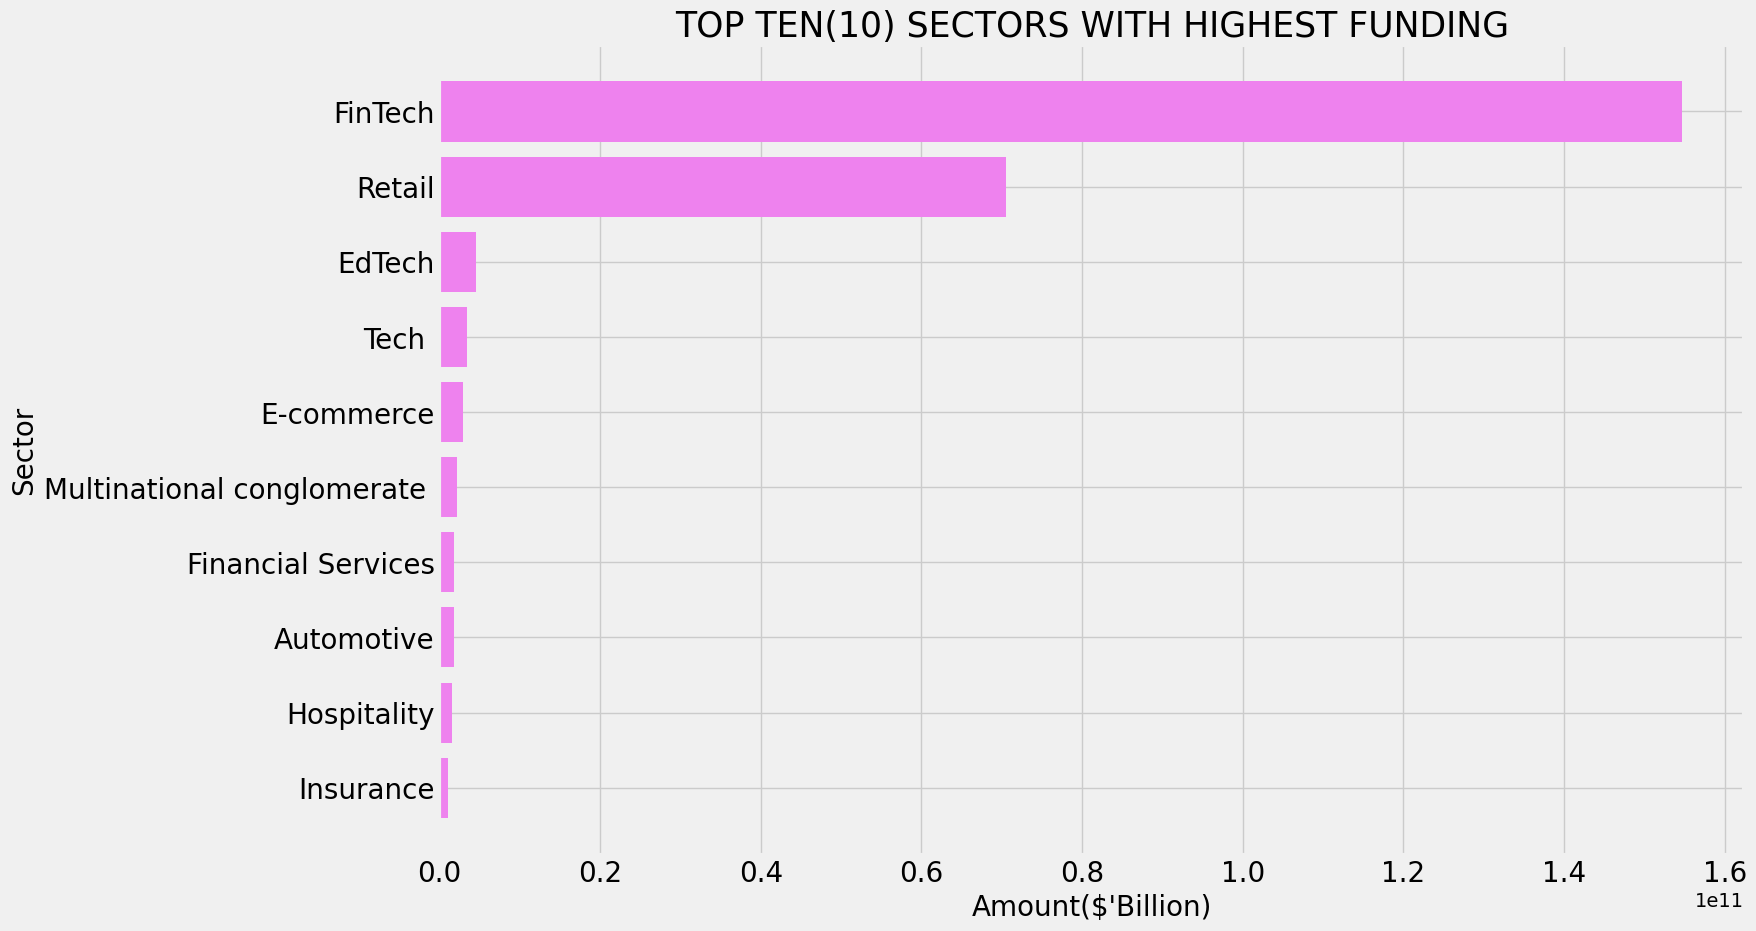

In [22]:
ten_top_industries = indian_startup_funding.groupby("Sector")["Amount($)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 10))
plt.barh(ten_top_industries.index, ten_top_industries.values, color="violet")
plt.title("TOP TEN(10) SECTORS WITH HIGHEST FUNDING", fontsize=25)
plt.xlabel("Amount($'Billion)", fontsize=20)
plt.ylabel("Sector", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().invert_yaxis()
plt.savefig('top10sectors_highestfunding.png',dpi=300)
plt.show()



### Ten(10) sectors with the least funding from investors

In [299]:
least_funded_industry = pd.DataFrame(indian_startup_funding.groupby("Sector")["Amount($)"].sum())
least_funded_industry = least_funded_industry.sort_values(by="Amount($)", ascending=False).tail(156)
least_funded_industry['Amount($)'] = least_funded_industry['Amount($)'].apply(lambda x: math.ceil(x))

In [300]:
# Remove 0 from Amount column. This is because NaN and undisclosed amounts were replaced with 0

least_Funded_industry = least_funded_industry[(least_funded_industry["Amount($)"] != 0)]
least_Funded_industry

,Amount($)
Sector,
"Internet, Social Entrepreneurship",16940
"Digital Media, Internet, Media and Entertainment, Online Portals, Social Media",15000
"Mobile, Software, Travel",14520
"Artificial Intelligence, Information Technology",14520
"B2B, Biometrics, Cyber Security, Fraud Detection, SaaS, Security",10000
"Food and Beverage, Food Delivery, Internet",7500
"Internet of Things, Waste Management",6050
"Education, Information Technology, Internet, Mobile, Software",1210
"Digital Marketing, SEM, SEO, Web Development",1210


## Q2.  What were the top five (5) cities with the most start-ups?

We outline the top five (5) cities that have the highest start-up establishments

In [24]:
# Remove Uknown from Location columns
df = indian_startup_funding[indian_startup_funding["Location"]!="Unknown"]

# Create Dataframe to show five(5) cities with most startups
top_five_cities = pd.DataFrame(df["Location"].value_counts().head())
top_five_cities

,Location
Bengaluru,919
Mumbai,468
Gurgaon,318
New Delhi,318
Chennai,106


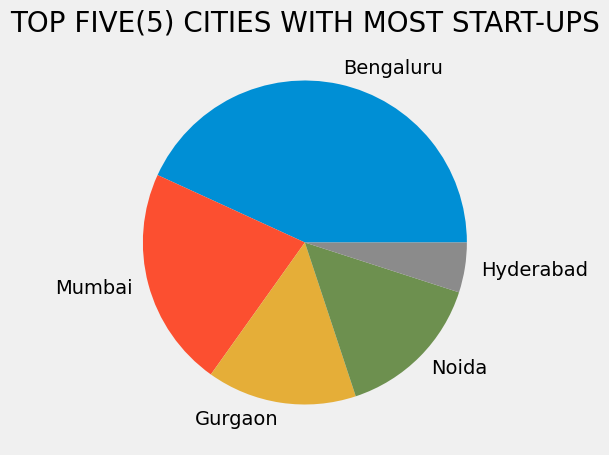

In [25]:
top_5_cities = df["Location"].value_counts().head() 

plt.figure(figsize=(10, 5))
plt.pie(top_5_cities, labels=df["Location"].head(), data=df["Location"].value_counts())
plt.title("TOP FIVE(5) CITIES WITH MOST START-UPS", fontsize=20)
plt.savefig('top5cities_moststartups.png',dpi=300)
plt.show()

## Q3. What were the top ten(10) startups with the most funding?
 

We look at the ten(10) startups with the most funding

In [26]:
top_startups = indian_startup_funding.groupby("Company")["Amount($)"].sum()
top_startups = top_startups.sort_values(ascending=False).reset_index()
top_startups["Amount($)"] = top_startups["Amount($)"].apply(lambda x: math.ceil(x))
top_startups.head(10)

,Company,Amount($)
0,Alteria Capital,150000000000
1,Reliance Retail Ventures Ltd,70000000000
2,Byju's,3612000000
3,Snowflake,3000000000
4,Reliance,2200000000
5,Swiggy,1956000000
6,OYO,1665000000
7,VerSe Innovation,1550000000
8,Dream Sports,1240000000
9,Zomato,1239000000


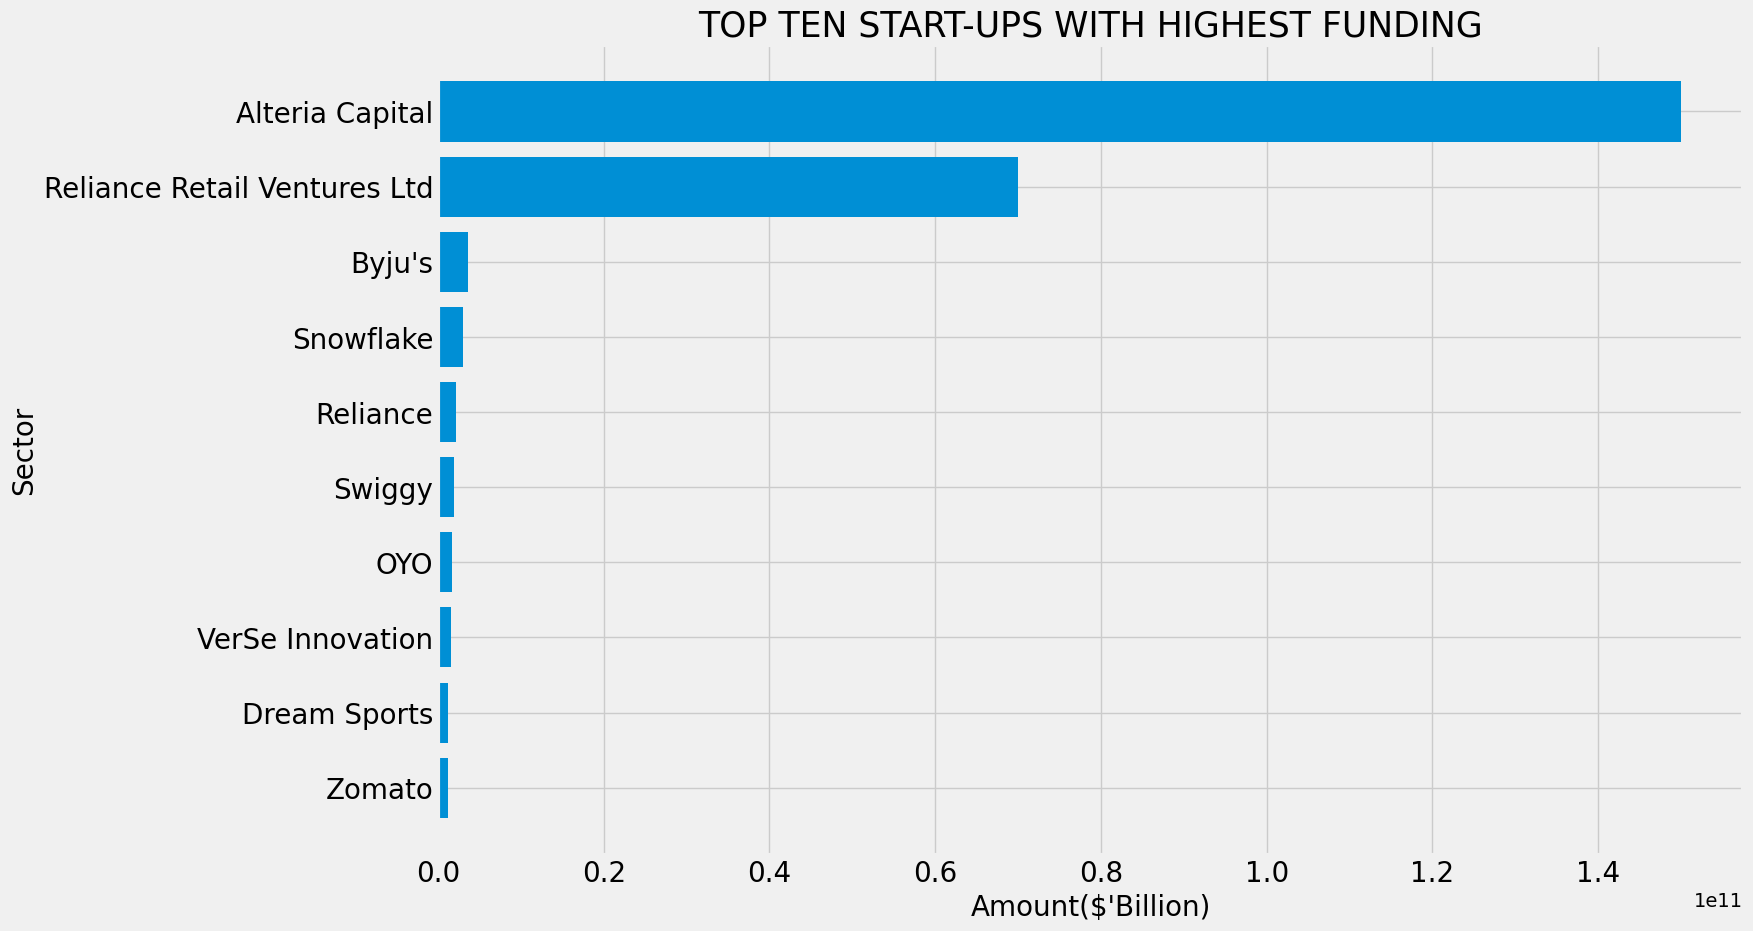

In [27]:
ten_top_startups = indian_startup_funding.groupby("Company")["Amount($)"].sum()
ten_top_startups = ten_top_startups.sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 10))
plt.barh(ten_top_startups.index, ten_top_startups.values)
plt.title("TOP TEN START-UPS WITH HIGHEST FUNDING", fontsize=25)
plt.xlabel("Amount($'Billion)", fontsize=20)
plt.ylabel("Sector", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().invert_yaxis()
plt.savefig('top10startups_highestfunding',dpi=300)
plt.show()


## Q4. Who were the top ten(10) investors by number of investments?

We look at the top ten(10) investors who made the highest number of investments.

In [28]:
# Remove Unknown from Investor column for analysis
investors = indian_startup_funding[indian_startup_funding["Investor"]!="Unknown"]

top_10_investors = pd.DataFrame(investors["Investor"].value_counts().head(10))
top_10_investors

,Investor
Inflection Point Ventures,34
Venture Catalysts,32
Mumbai Angels Network,17
Angel Investors,13
Tiger Global,12
Titan Capital,11
Unicorn India Ventures,10
Sequoia Capital India,9
Alteria Capital,9
Better Capital,9


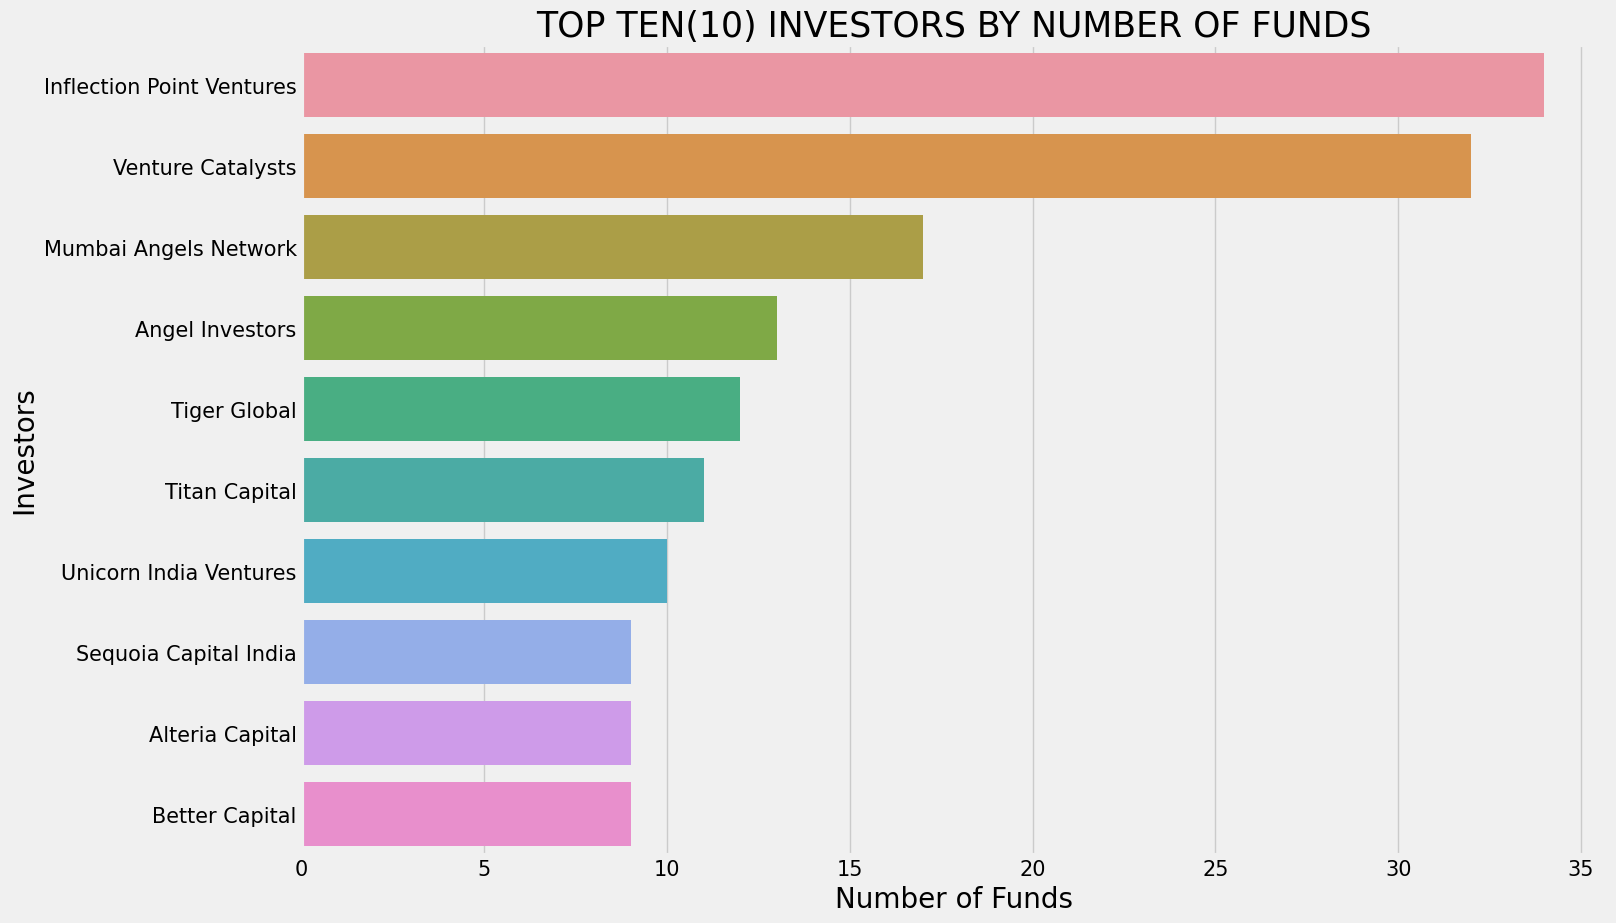

In [29]:
top_10_investors = investors["Investor"].value_counts().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(top_10_investors.values, top_10_investors.index)
plt.title("TOP TEN(10) INVESTORS BY NUMBER OF FUNDS", fontsize=25)
plt.xlabel("Number of Funds", fontsize=20)
plt.ylabel("Investors", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('top10investors_noofinvestments.png',dpi=300)
plt.show()

## 5. What was the trend of funding in the Indian start-up ecosystem in the referenced year?

We seek to discover the trend of funding to know if funding is appreciating, reducing or stable.

In [30]:
funding_trend = indian_startup_funding.groupby("funding_year")["Amount($)"].sum()
funding_trend = funding_trend.reset_index()
funding_trend["Amount($)"] = funding_trend["Amount($)"].apply(lambda x: math.ceil(x))
funding_trend

,funding_year,Amount($)
0,2018,6429010902
1,2019,3335433200
2,2020,90930476656
3,2021,179407526000


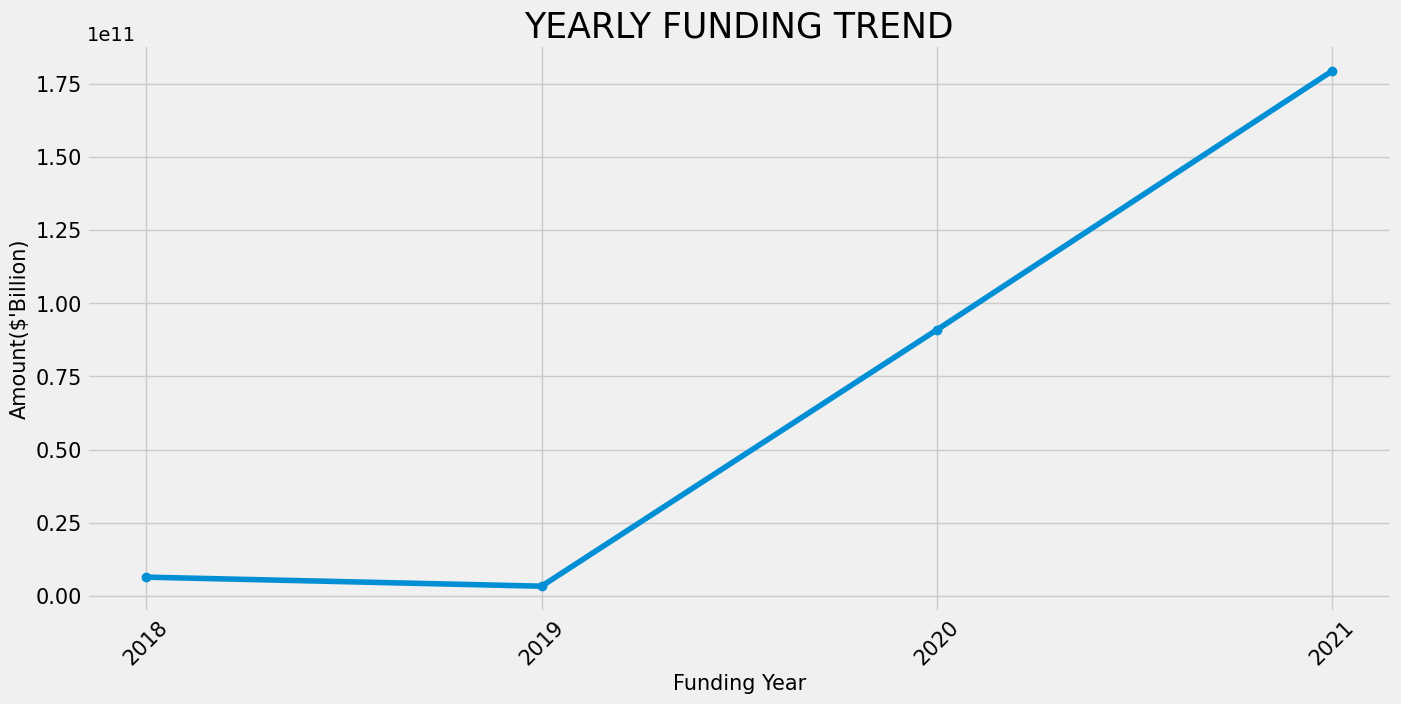

In [31]:
trend = indian_startup_funding.groupby("funding_year")["Amount($)"].sum()

plt.figure(figsize=(15, 7))

plt.plot(trend.index, trend.values, marker="o")
plt.title("YEARLY FUNDING TREND", fontsize=25)
plt.xlabel("Funding Year", fontsize=15)
plt.ylabel("Amount($'Billion)", fontsize=15)
plt.xticks(trend.index, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.savefig('trend.png',dpi=300)
plt.show()

#### Calculating the percentage change in funding respectively with the funding years

In [21]:
# The total yearly funds was from our earlier calculations in the funding trend.
funding_2018 = 6429010902
funding_2019 = 3335433200
funding_2020 = 90930476656
funding_2021 = 179407526000

print(f"Percentage Change in 2019 was {(((funding_2019 - funding_2018) / funding_2018) * 100):.2f}%")
print(f"Percentage Change in 2020 was {(((funding_2020 - funding_2019) / funding_2019) * 100):.2f}%")
print(f"Percentage Change in 2021 was {(((funding_2021 - funding_2020) / funding_2020) * 100):.2f}%")

Percentage Change in 2019 was -48.12%
Percentage Change in 2020 was 2626.20%
Percentage Change in 2021 was 97.30%


## Q6. Which stage of funding did startups receive the most funds?

We analyze the stage of investment where investors released the most funds to start-ups.

In [32]:
# Remove unknown from stage column for analysis
stage = indian_startup_funding[indian_startup_funding["Stage"] != "Unknown"]

funded_stage = indian_startup_funding.groupby(stage["Stage"])["Amount($)"].sum()
funded_stage = funded_stage.sort_values(ascending=False).reset_index().head(10)
funded_stage["Amount($)"] = funded_stage["Amount($)"].apply(lambda x: math.ceil(x))
funded_stage

,Stage,Amount($)
0,Debt,150720853200
1,Series C,5384668700
2,Series B,3720896600
3,Series D,3522928160
4,Series E,3417377000
5,Series A,2842712146
6,Series H,2312500000
7,Private Equity,1995250000
8,Series F,1703200000
9,Seed,998213641


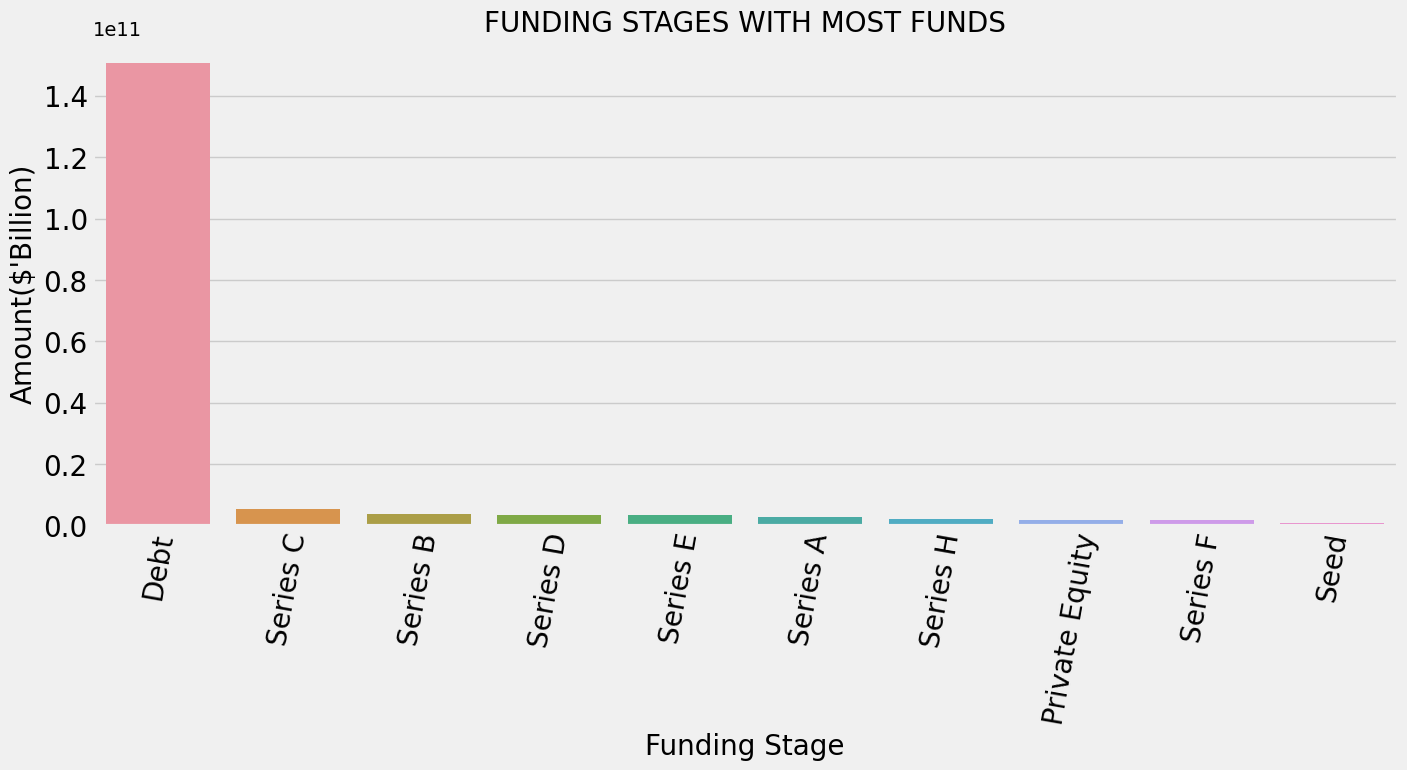

In [52]:
plt.figure(figsize=(15, 6))

fundedstage = indian_startup_funding.groupby(stage["Stage"])["Amount($)"].sum().sort_values(ascending=False).head(10)

sns.barplot(fundedstage.index, fundedstage.values)
plt.title("FUNDING STAGES WITH MOST FUNDS", fontsize=20)
plt.xlabel("Funding Stage", fontsize=20)
plt.ylabel("Amount($'Billion)", fontsize=20)
plt.xticks(fontsize=20, rotation=80)
plt.yticks(fontsize=20)
plt.savefig('fundingstage_mostfunds.png',dpi=300)
plt.show()

## Q7. What were the common investment types?
We try to find out the stage at which investors made the most number of investment.

In [35]:
# Remove Unknown from Stage column for analysis
investment = indian_startup_funding[indian_startup_funding["Stage"]!= "Unknown"]

common_investment = pd.DataFrame(investment["Stage"].value_counts().head(10))
common_investment

,Stage
Seed,685
Series A,304
Pre-Series A,282
Series B,134
Series C,114
Pre-seed,63
Debt,58
Series D,50
Angel,41
Venture,37


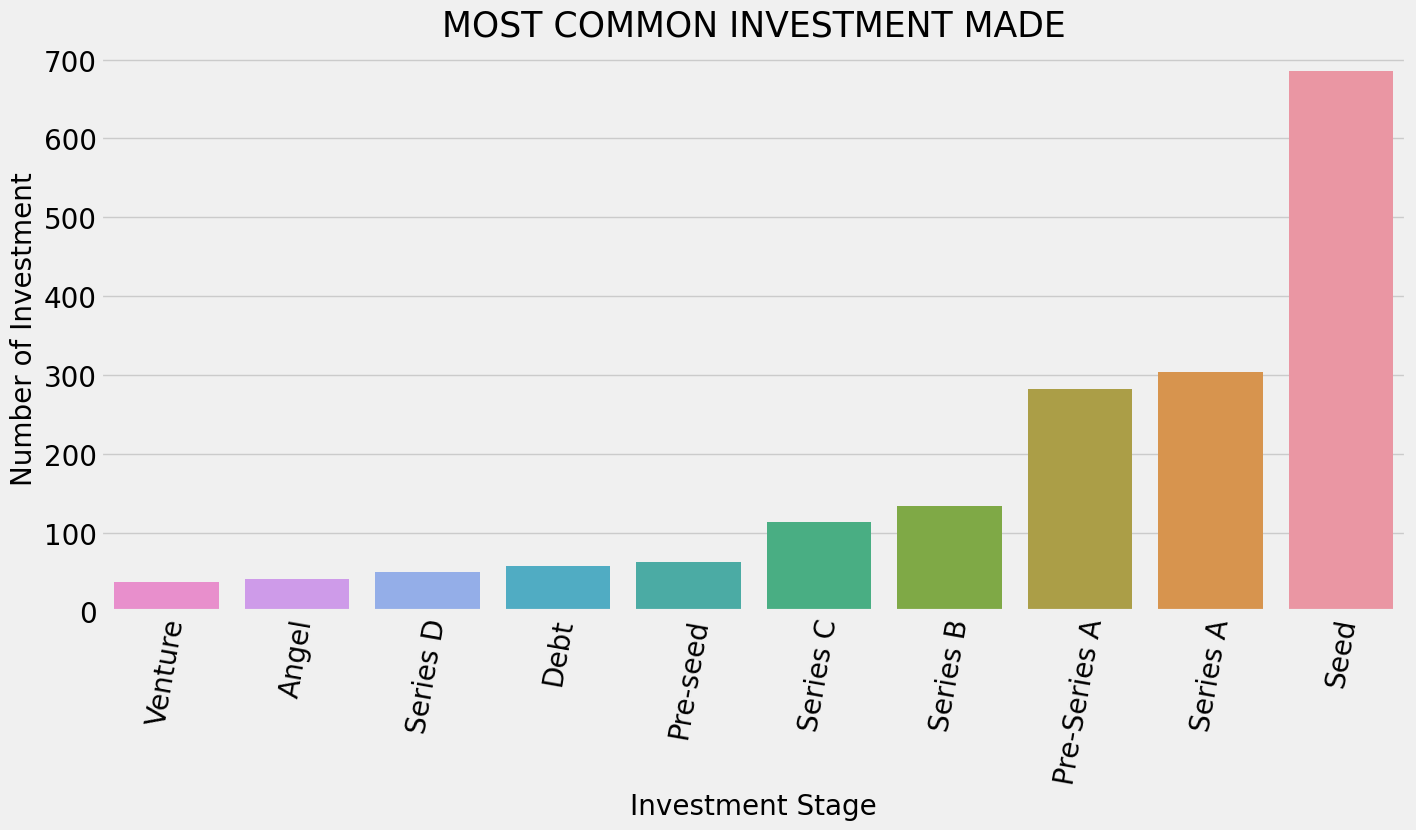

In [53]:
common_investment = investment["Stage"].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.barplot(common_investment.index, common_investment.values)
plt.title("MOST COMMON INVESTMENT MADE", fontsize=25)
plt.xlabel("Investment Stage", fontsize=20)
plt.ylabel("Number of Investment", fontsize=20)
plt.gca().invert_xaxis()
plt.xticks(fontsize=20, rotation=80)
plt.yticks(fontsize=20)
plt.savefig('common_investment.png',dpi=300)
plt.show()

## Q8. Which Investors invested the biggest funds in identified Sectors

We seek to find out the leading investors who made huge investments in sectors. It is worthy to note that the Investor column is highly likely to contain multiple investors

In [37]:
# Remove "Unknown" from the Investor column

invest = indian_startup_funding[indian_startup_funding["Investor"] != "Unknown"]

In [38]:
investors = indian_startup_funding.groupby([(invest["Investor"]), "Sector"])["Amount($)"].sum().apply(lambda x: math.ceil(x))
inv = investors.sort_values(ascending=False).reset_index()
inv.head()

,Investor,Sector,Amount($)
0,"Silver Lake, Mubadala Investment Company",Retail,70000000000
1,"Salesforce Ventures, Dragoneer Investment Group",Tech,3000000000
2,"Facebook, Google, KKR, Silver Lake",Multinational conglomerate,2200000000
3,"Canaan Valley Capital, Glade Brook Capital Par...",Innovation Management,1000000000
4,"Bertelsmann India Investments, Sequoia Capital...",Education,850000000


## Q9. Which Cities received the highest funding

Here, we seek to know the cities that received the highest funding from investors.

In [39]:
# Remove unknown values from the Location column

city = indian_startup_funding[indian_startup_funding["Location"] != "Unknown"]

In [40]:
city_funding = indian_startup_funding.groupby(city["Location"])["Amount($)"].sum()
city_funding = city_funding.sort_values(ascending=False).reset_index()
city_funding["Amount($)"] = city_funding["Amount($)"].apply(lambda x: math.ceil(x))

In [41]:
# Remove California from values in Location column since we are only concerned about cities in India

city_Funding = city_funding[city_funding["Location"] != "California"]
city_Funding.head(10)

,Location,Amount($)
0,Mumbai,231487298993
1,Bengaluru,23941060335
2,Gurgaon,6950941930
3,New Delhi,4209442150
5,Pune,1393892205
6,Haryana,1189955000
7,Chennai,1123573826
8,Noida,587590000
9,Jaipur,568914000
10,Hyderabad,408946440


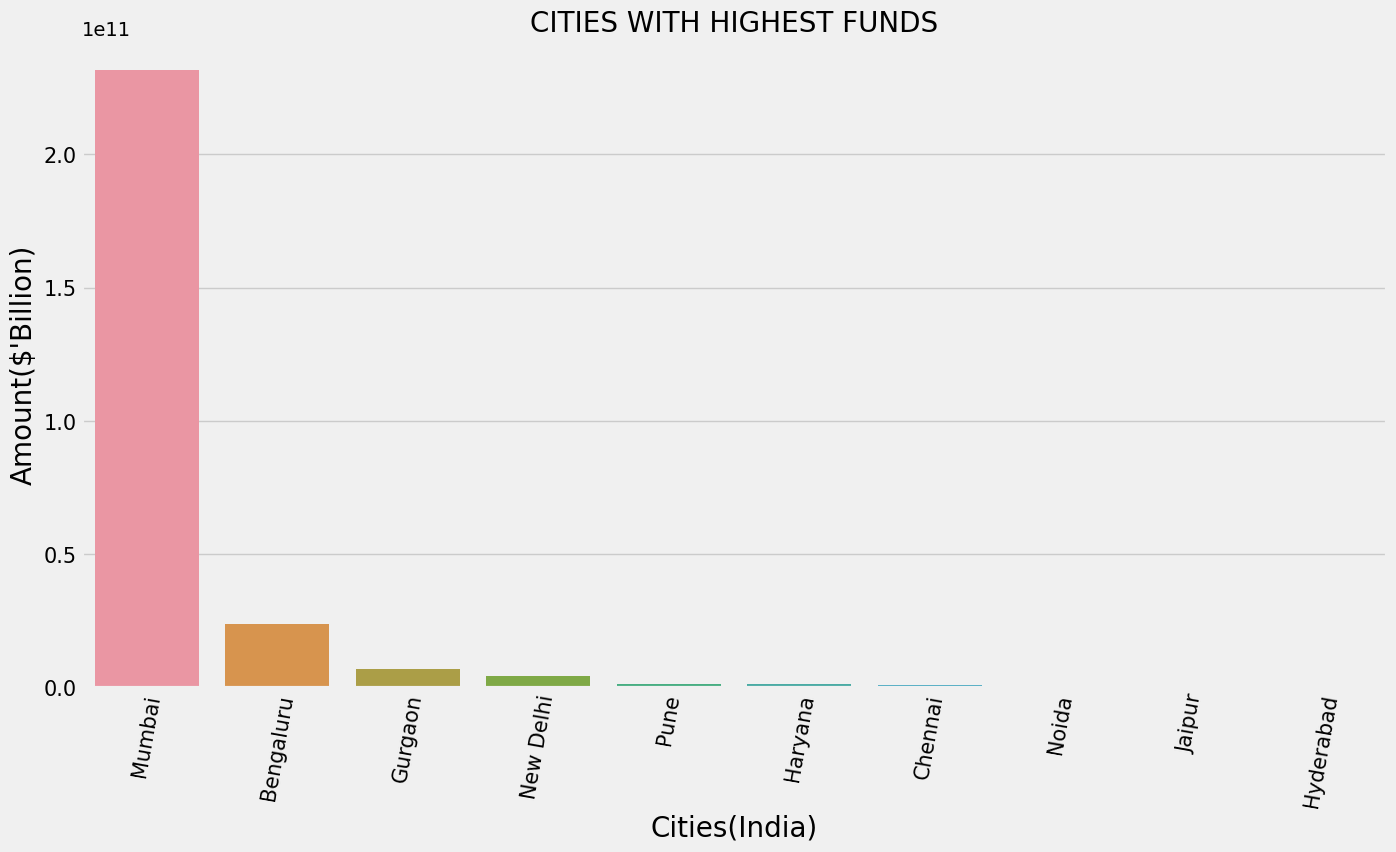

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Location", y="Amount($)", data=city_Funding.head(10))
plt.title("CITIES WITH HIGHEST FUNDS", fontsize=20)
plt.xlabel("Cities(India)", fontsize=20)
plt.ylabel("Amount($'Billion)", fontsize=20)
plt.xticks(fontsize=15, rotation=80)
plt.yticks(fontsize=15)
plt.savefig('cities_highestfunding.png',dpi=300)
plt.show()

## Q10. Average amount a startup is likely to receive as total funding

We want to know the average amount our startup is likely to receive as total funding throughout the entire stages of funding

In [43]:
number_of_startups = len(indian_startup_funding["Company"].unique())
total_funding = indian_startup_funding["Amount($)"].sum()

In [44]:
print(f"Average Amount a startup is likely to receive as funding is US${(total_funding / number_of_startups):.2f}")

Average Amount a startup is likely to receive as funding is US$127319293.98


## Q11. Average amount a startup is likely to receive as Seed Fund

We try to acertain the amount our startup is likely to receive at the beginning stages as a seed fund.

In [9]:
seed_amount = (indian_startup_funding[indian_startup_funding.Stage == "Seed"])["Amount($)"].sum()
seed_startups = len((indian_startup_funding[indian_startup_funding.Stage == "Seed"]))
average_seed_amount = seed_amount / seed_startups

In [10]:
print(f"Average Amount a startup is likely to receive as Seed Fund is US${average_seed_amount:.2f}")

Average Amount a startup is likely to receive as Seed Fund is US$1457246.19


# INSIGHTS

### The following are the insights that we gained from our analysis

There were 2200 unique startups funded for the period. Hence, 652 startups received multiple funding.
Total funding received by startups was US$ 280,102,446,757.83. 

1. The top sectors that received the most funding were:
- FinTech
- Retail
- EdTech

2. The top three(3) cities with the most startups were:
- Bengaluru(919)
- Mumbai(468)
- Gurgaon(318)
- New Delhi(318)

3. These startups received the highest funding from investors:
- Alteria Capital
- Reliance
- Byju's

4. These were the top investors who made the highest number of investments:
- Inflection Point Ventures
- Venture Catalysts
- Mumbai Angel Network

5. From our analysis we found out that funding trend was generally positive.
- In 2019, funding reduced at a rate of 48.12%
- In 2020, there was an appreciation in funding. Investors increased funding at rate of 2626.20%
- In 2021, the funding momentum rose again by 97.30%

6. The commonest investment stages that investors made the highest number of funds available were:
- Seed Round
- Series A Round
- Pre-series A Round

7. These funding stages were the stages that investors made the biggest funds available:
- Debt Financing
- Series C
- Series B
- Series D

8. These investors were the biggest investors who invested most funds in a particular sector:
- Silver Lake, Mubadala Investment Company
- Salesforce Ventures, Dragoneer Investment Company
- Facebook, Google, Silver Lake
- Sequoia Capital

9. These are the cities that received the highest amount in funding from investors:
- Mumbai
- Bengaluru
- Gurgaon
- New Delhi

# RECOMMENDATIONS

The Indian start-up ecosystem is experiencing an increasing momentum. The timing for penetration into the ecosystem is right. 

From our analysis, the trend of funding has been increasing at a steady rate. With the total number of startups for the recorded period being 2200, the average amount a startup is likely to receive as total funding is US$ 127,319,293.98. <br />This means that competition for funding is not very intense. Investors are ready to invest in promising startups.

We therefore recommend the following;

- The company should consider establishing in Bengaluru, Mumbai, New Delhi and Gurgaon. These cities have the most startups. A startup in these cities is also likely to receive significant amount of funding.


- The company is right to seek funding in the early stages. Most investors favored investing during the Seed and Series A rounds. The average amount our company is likely to recieve as seed fund is US$ 1,457,246.19


- The company should consider seeking funding from Sequoia Capital, Inflection Point Ventures, Venture Catalysts, Silver Lake, Mumbai Angel Network and Salesforce Ventures. These investors invested in a couple of startups and raised higher amount of funds.


- The company should consider establishing a startup in Fintech, Retail, E-commerce and EdTech as these sectors are most favored by investors with higher number of investments and huge inflow of funds.